<a href="https://colab.research.google.com/github/musama00/Product-Demand-Prediction-Using-Machine-Learning-FYP-/blob/main/Final_Year_Project_(Product_Demand_Prediction)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
train = train.merge(stores, on='Store', how = 'left')
train = train.merge(features, on= ['Store', 'Date'], how='left')
# Selecting the required columns from the train DataFrame
selected_columns = ['Store', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Renaming 'IsHoliday_x' to 'Holiday_Flag' to match the required column names
data = train[selected_columns].rename(columns={'IsHoliday_x': 'Holiday_Flag'})

data['Holiday_Flag'] = data['Holiday_Flag'].astype(int)

data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")

# data.head()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Weekly_Sales  421570 non-null  float64       
 3   Holiday_Flag  421570 non-null  int64         
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   CPI           421570 non-null  float64       
 7   Unemployment  421570 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 25.7 MB


In [ ]:
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05      24924.50             0        42.31       2.572   
1      1 2010-02-12      46039.49             1        38.51       2.548   
2      1 2010-02-19      41595.55             0        39.93       2.514   
3      1 2010-02-26      19403.54             0        46.63       2.561   
4      1 2010-03-05      21827.90             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [ ]:
data["Weekly_Sales"].min()

-4988.94

In [ ]:
data["Weekly_Sales"].max()

693099.36

In [ ]:
data["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
data["Store"].nunique()

45

In [ ]:
data["Store"].value_counts()

Store
13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: count, dtype: int64

In [ ]:
data["Temperature"].nunique()

3528

In [ ]:
data["Unemployment"].nunique()

349

In [ ]:
data["CPI"].nunique()

2145

In [ ]:
data["Holiday_Flag"].value_counts()

Holiday_Flag
0    391909
1     29661
Name: count, dtype: int64

In [ ]:
print(f"Data is from {data['Date'].iloc[0]}, to date {data['Date'].iloc[-1]}")


Data is from 2010-02-05 00:00:00, to date 2012-10-26 00:00:00


In [ ]:
print(data.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")


/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


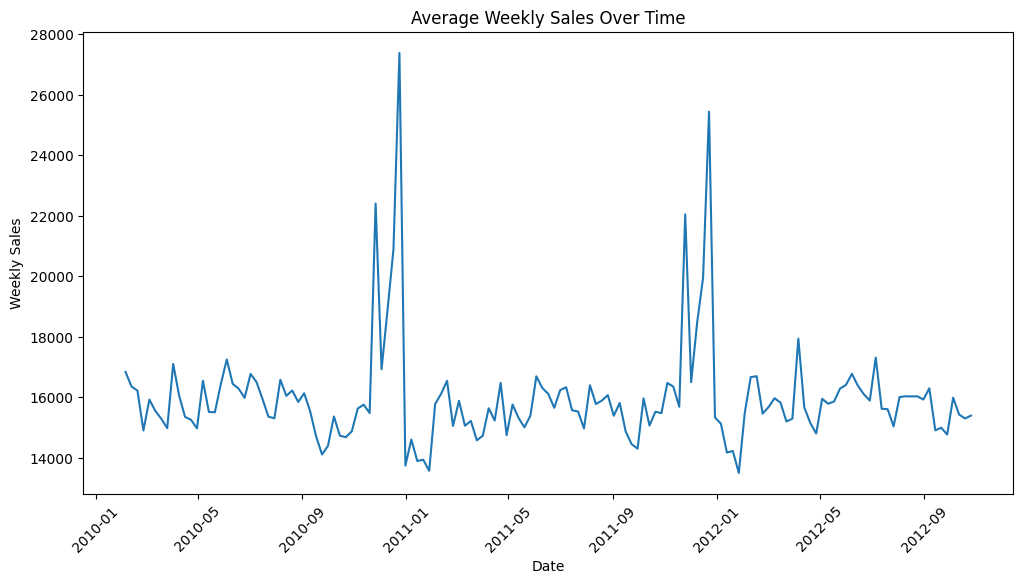

In [ ]:
# Visualization: Sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data, errorbar=None)
plt.title('Average Weekly Sales Over Time')
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.show()



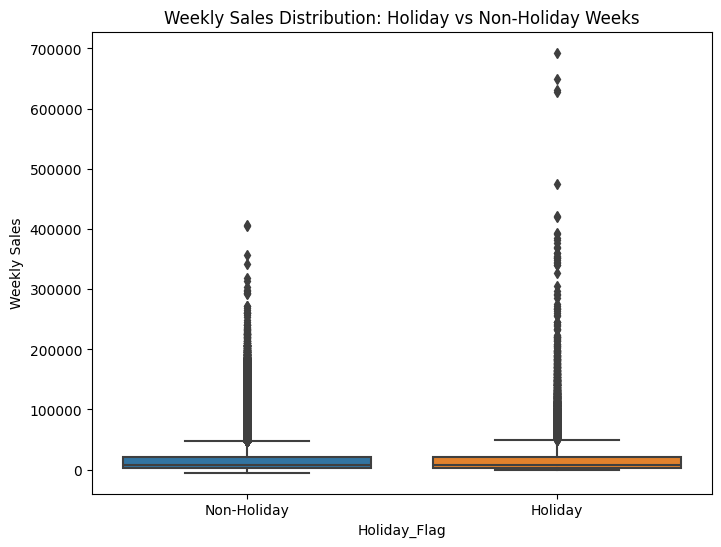

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Distribution: Holiday vs Non-Holiday Weeks')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.ylabel('Weekly Sales')
plt.show()

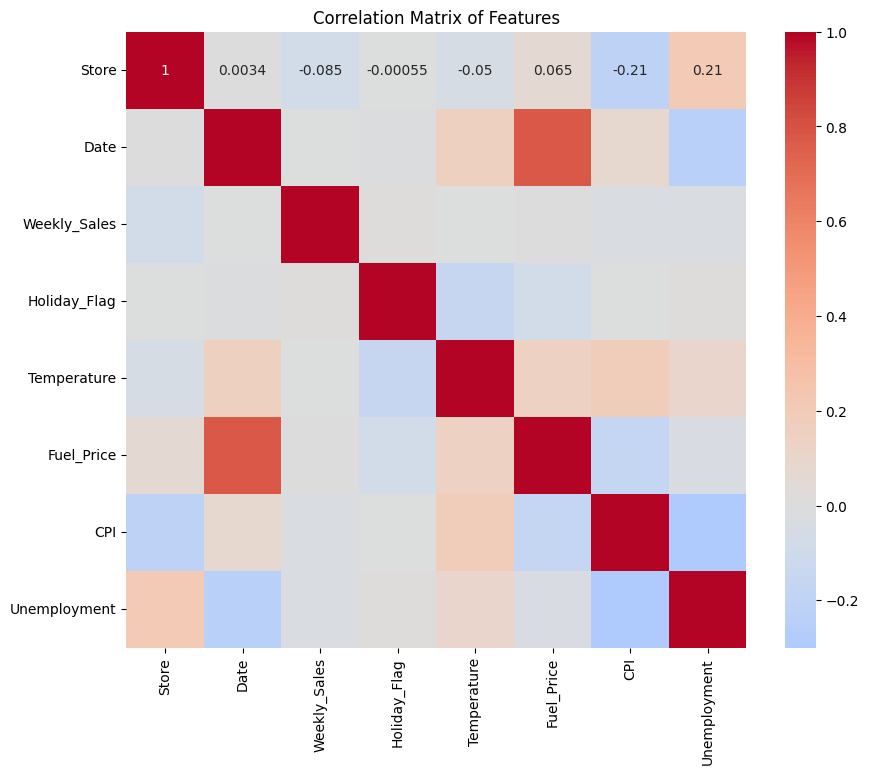

In [ ]:
# Calculate correlations
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

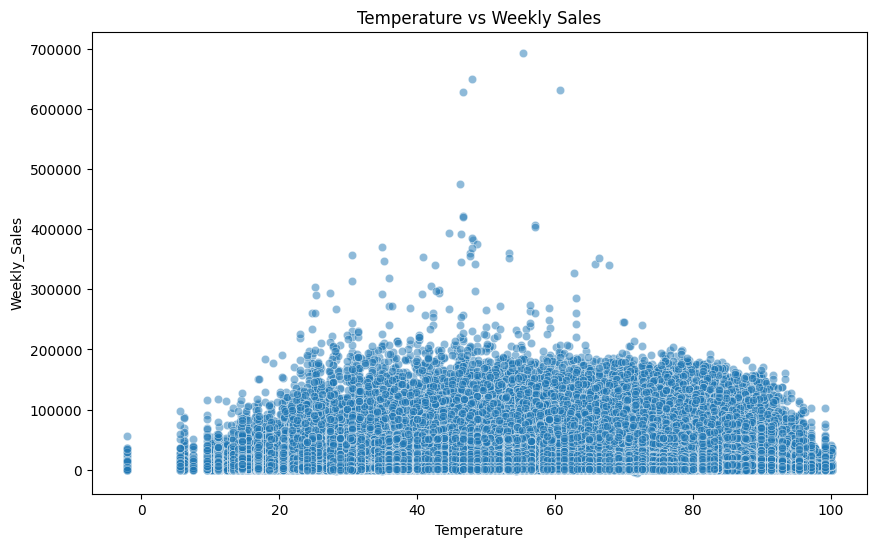

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data, alpha=0.5)
plt.title('Temperature vs Weekly Sales')
plt.show()

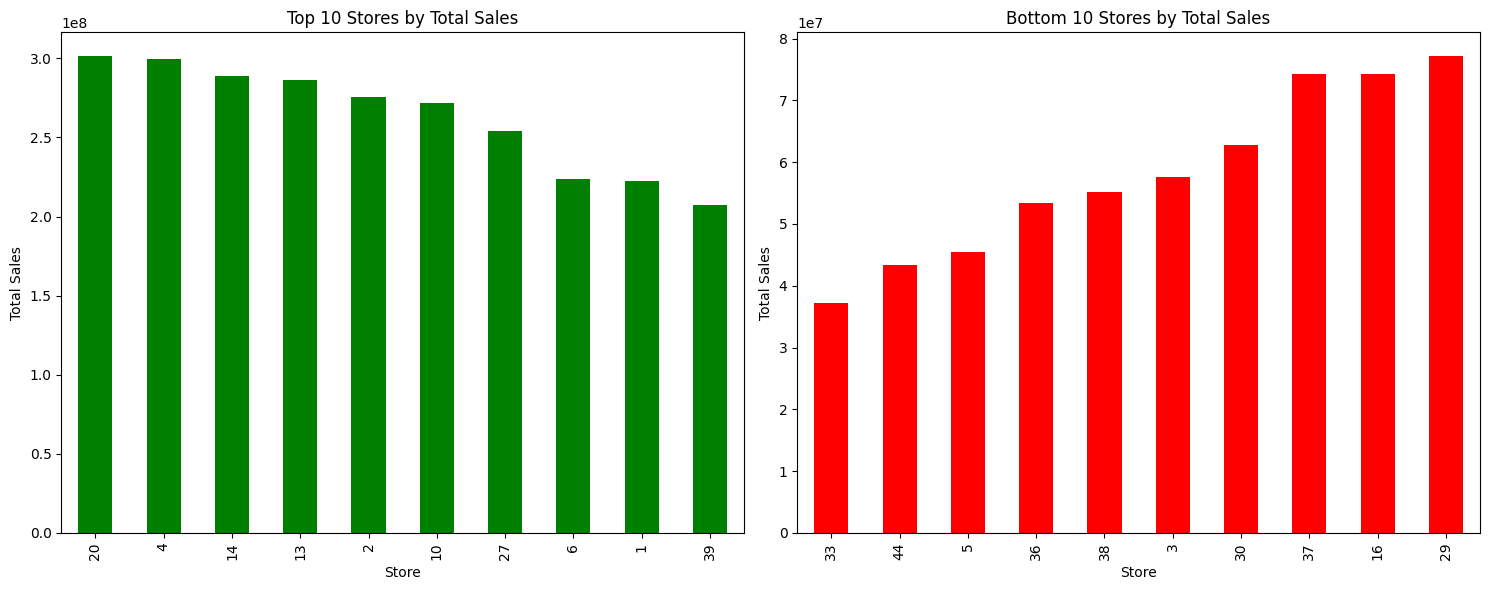

In [ ]:
# Store-wise analysis
def plot_store_analysis(data):
    # Top 10 stores by sales
    top_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)



    # Bottom 10 stores by sales
    bottom_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values().head(10)

    plt.figure(figsize=(15, 6))

    # Top stores
    plt.subplot(1, 2, 1)
    top_stores.plot(kind='bar', color='green', title='Top 10 Stores by Total Sales')
    plt.ylabel('Total Sales')

    # Bottom stores
    plt.subplot(1, 2, 2)
    bottom_stores.plot(kind='bar', color='red', title='Bottom 10 Stores by Total Sales')
    plt.ylabel('Total Sales')

    plt.tight_layout()
    plt.show()

    return top_stores
top_stores = plot_store_analysis(data)


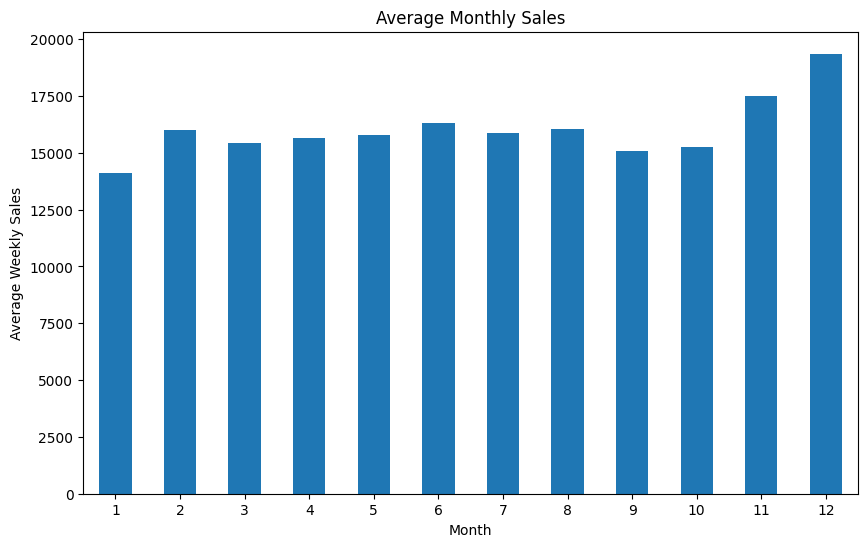

In [ ]:
# Extract month from date
data['Month'] = data['Date'].dt.month

# Plot monthly sales
plt.figure(figsize=(10, 6))
data.groupby('Month')['Weekly_Sales'].mean().plot(kind='bar')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

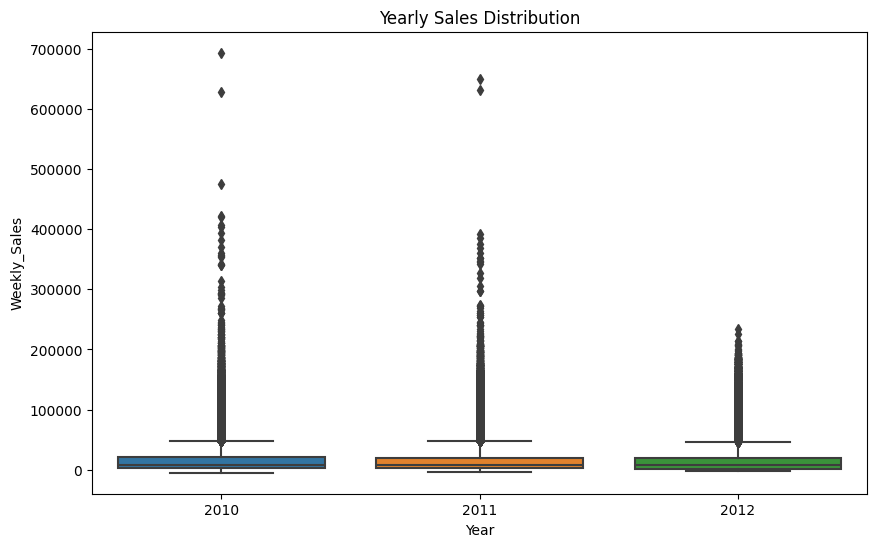

In [ ]:
data['Year'] = data['Date'].dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Weekly_Sales', data=data)
plt.title('Yearly Sales Distribution')
plt.show()

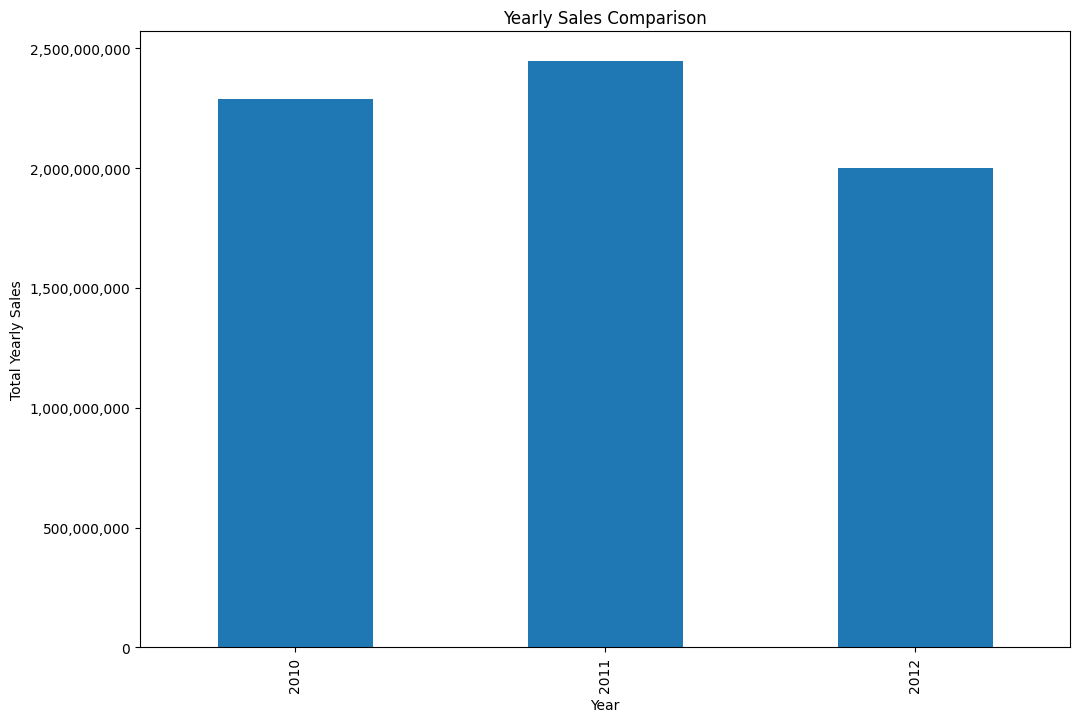

In [ ]:
# Assuming `data` is your DataFrame
yearly_sales = data.groupby('Year')['Weekly_Sales'].sum()

# Plot settings for large data
plt.figure(figsize=(12, 8))

# Yearly sales trend
ax = yearly_sales.plot(kind='bar', title='Yearly Sales Comparison')
plt.ylabel('Total Yearly Sales')

# Format y-axis to show exact values
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


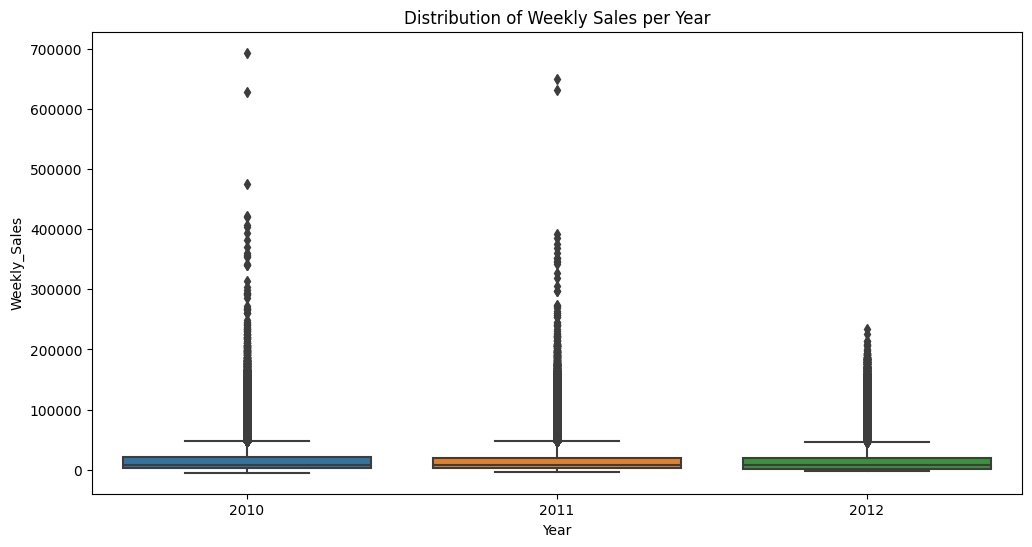

In [ ]:
# Visualization: Sales distribution per year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Weekly_Sales', data=data)
plt.title("Distribution of Weekly Sales per Year")
plt.show()



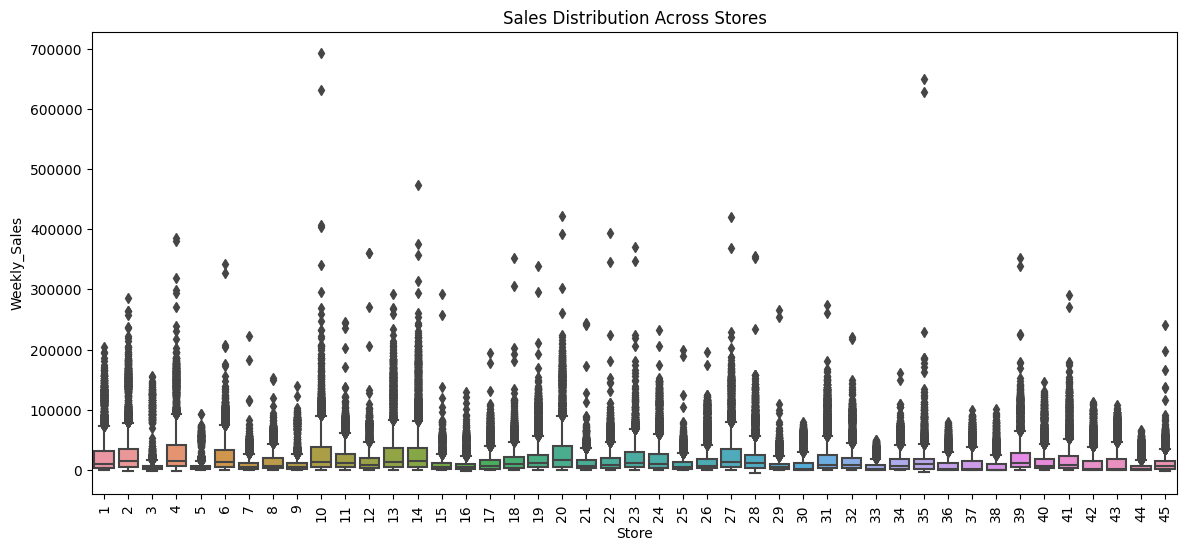

In [ ]:
# Visualization: Sales Distribution by Store
plt.figure(figsize=(14, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=data)
plt.title("Sales Distribution Across Stores")
plt.xticks(rotation=90)
plt.show()



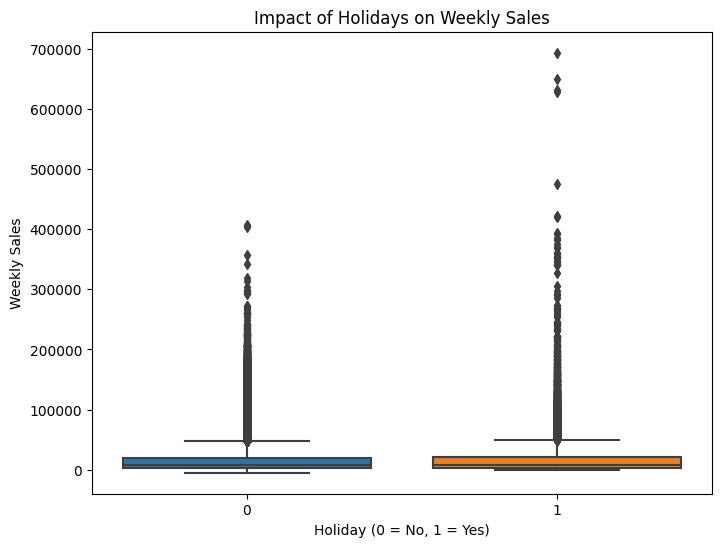

In [ ]:
# Visualization: Impact of Holidays on Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title("Impact of Holidays on Weekly Sales")
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Weekly Sales")
plt.show()



/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/seaborn/_oldcor

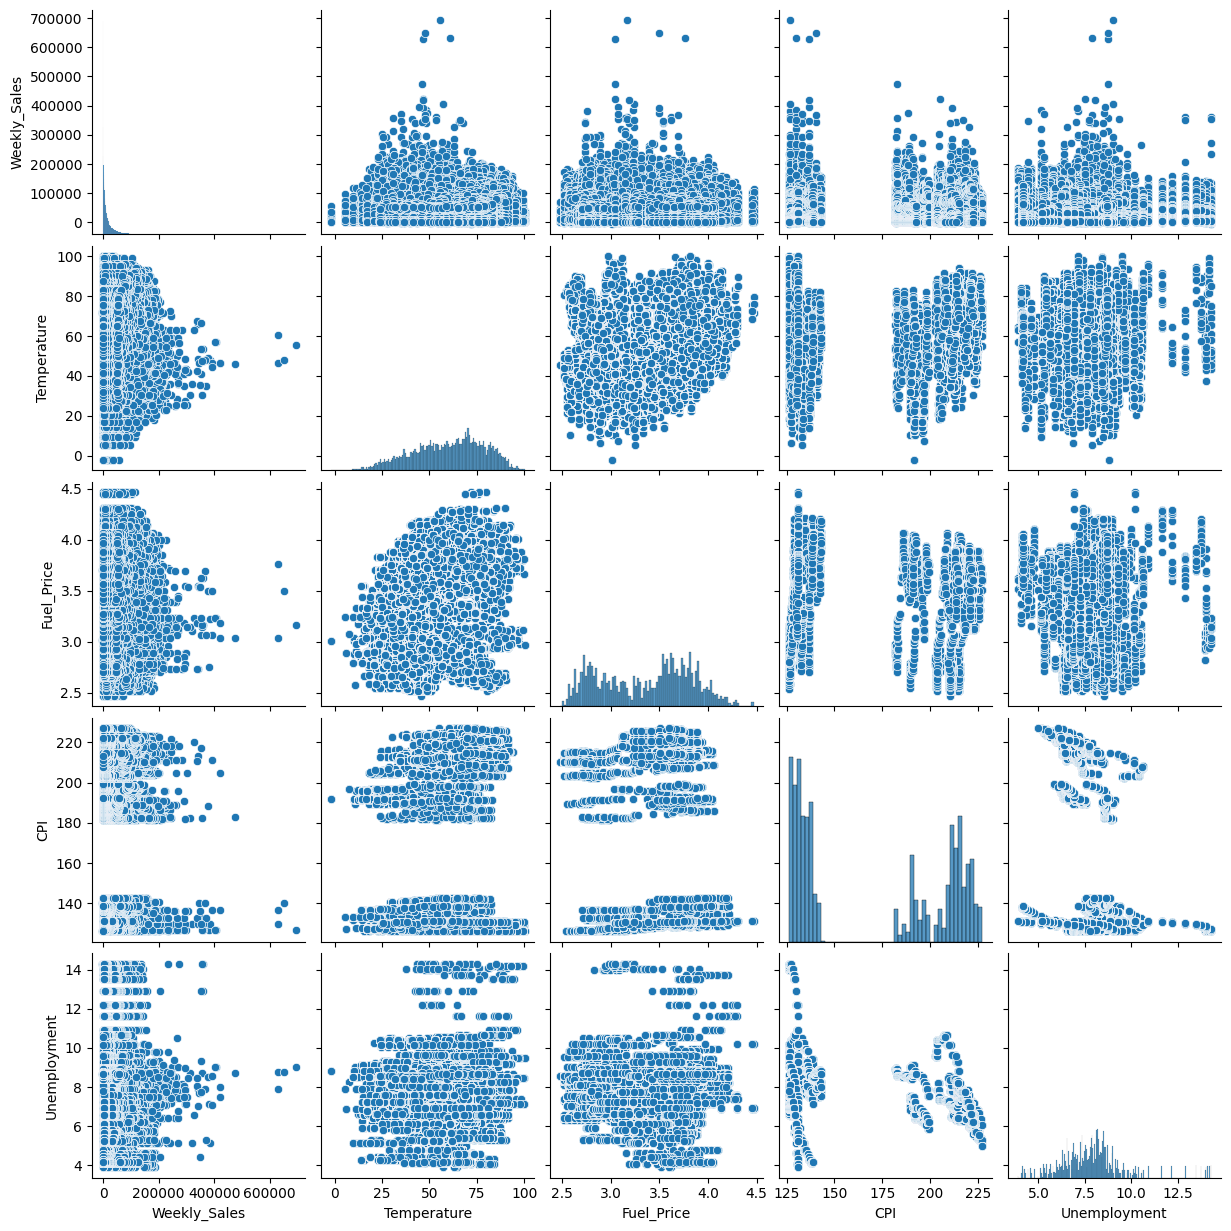

In [ ]:
# Pairplot to visualize relationships

sns.pairplot(data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()


In [ ]:
data.describe()


Store                           Date   Weekly_Sales  \
count  421570.000000                         421570  421570.000000   
mean       22.200546  2011-06-18 08:30:31.963375104   15981.258123   
min         1.000000            2010-02-05 00:00:00   -4988.940000   
25%        11.000000            2010-10-08 00:00:00    2079.650000   
50%        22.000000            2011-06-17 00:00:00    7612.030000   
75%        33.000000            2012-02-24 00:00:00   20205.852500   
max        45.000000            2012-10-26 00:00:00  693099.360000   
std        12.785297                            NaN   22711.183519   

        Holiday_Flag    Temperature     Fuel_Price            CPI  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean        0.070358      60.090059       3.361027     171.201947   
min         0.000000      -2.060000       2.472000     126.064000   
25%         0.000000      46.680000       2.933000     132.022667   
50%         0.000000      62.090000       3.452000     182.318780   
75%         0.000000      74.280000       3.738000     212.416993   
max         1.000000     100.140000       4.468000     227.232807   
std         0.255750      18.447931       0.458515      39.159276   

        Unemployment          Month           Year  
count  421570.000000  421570.000000  421570.000000  
mean        7.960289       6.449510    2010.968591  
min         3.879000       1.000000    2010.000000  
25%         6.891000       4.000000    2010.000000  
50%         7.866000       6.000000    2011.000000  
75%         8.572000       9.000000    2012.000000  
max        14.313000      12.000000    2012.000000  
std         1.863296       3.243217       0.796876

In [ ]:
# Convert Date to datetime and extract features
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week
data['Day'] = data['Date'].dt.day

# Drop the original Date column
# data.drop('Date', axis=1, inplace=True)

# Check for duplicates
print(f"Duplicate rows: {data.duplicated().sum()}")

# Check for outliers
# numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
# df[numeric_cols].boxplot()
# plt.xticks(rotation=45)
# plt.show()

Duplicate rows: 95


In [ ]:
#Appying ML Models on Store 1 only
# Filter data for Store 1
data_store_1 = data[data["Store"] == 1]

In [ ]:
# Create lag features for time series
data_store_1.sort_values(['Store', 'Year', 'Month', 'Week'], inplace=True)
for lag in [1, 2, 3, 4]:
    data_store_1[f'Weekly_Sales_lag_{lag}'] = data_store_1.groupby('Store')['Weekly_Sales'].shift(lag)

# Create rolling statistics
data_store_1['Weekly_Sales_rolling_mean_4'] = data_store_1.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(4).mean())
data_store_1['Weekly_Sales_rolling_std_4'] = data_store_1.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(4).std())

# Drop rows with NaN values created by lag features
data_store_1.dropna(inplace=True)

/tmp/ipykernel_36277/1897779782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_store_1.sort_values(['Store', 'Year', 'Month', 'Week'], inplace=True)
/tmp/ipykernel_36277/1897779782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_store_1[f'Weekly_Sales_lag_{lag}'] = data_store_1.groupby('Store')['Weekly_Sales'].shift(lag)
/tmp/ipykernel_36277/1897779782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
data_store_1.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
572       1 2010-02-05      32229.38             0        42.31       2.572   
715       1 2010-02-05       5749.03             0        42.31       2.572   
858       1 2010-02-05      21084.08             0        42.31       2.572   
1001      1 2010-02-05      40129.01             0        42.31       2.572   
1144      1 2010-02-05      16930.99             0        42.31       2.572   

             CPI  Unemployment  Month  Year  Week  Day  Weekly_Sales_lag_1  \
572   211.096358         8.106      2  2010     5    5            39954.04   
715   211.096358         8.106      2  2010     5    5            32229.38   
858   211.096358         8.106      2  2010     5    5             5749.03   
1001  211.096358         8.106      2  2010     5    5            21084.08   
1144  211.096358         8.106      2  2010     5    5            40129.01   

      Weekly_Sales_lag_2  Weekly_Sales_lag_3  Weekly_Sales_lag_4  \
572             13740.12            50605.27            24924.50   
715             39954.04            13740.12            50605.27   
858             32229.38            39954.04            13740.12   
1001             5749.03            32229.38            39954.04   
1144            21084.08             5749.03            32229.38   

      Weekly_Sales_rolling_mean_4  Weekly_Sales_rolling_std_4  
572                    34132.2025                15542.559923  
715                    22918.1425                15873.830334  
858                    24754.1325                14850.137144  
1001                   24797.8750                14909.971340  
1144                   20973.2775                14318.661075

Correlation with Weekly_Sales:
 Weekly_Sales                   1.000000
Weekly_Sales_rolling_mean_4    0.760831
Weekly_Sales_rolling_std_4     0.633509
Weekly_Sales_lag_1             0.541869
Weekly_Sales_lag_2             0.450038
Weekly_Sales_lag_3             0.394863
Weekly_Sales_lag_4             0.200200
CPI                            0.018047
Date                           0.017552
Month                          0.014609
Holiday_Flag                   0.013239
Year                           0.013045
Week                           0.013000
Fuel_Price                     0.011613
Unemployment                  -0.008872
Temperature                   -0.012614
Day                           -0.019665
Store                               NaN
Name: Weekly_Sales, dtype: float64
Selected features: ['Weekly_Sales_rolling_mean_4', 'Weekly_Sales_rolling_std_4', 'Weekly_Sales_lag_1', 'Weekly_Sales_lag_2', 'Weekly_Sales_lag_3', 'Weekly_Sales_lag_4']


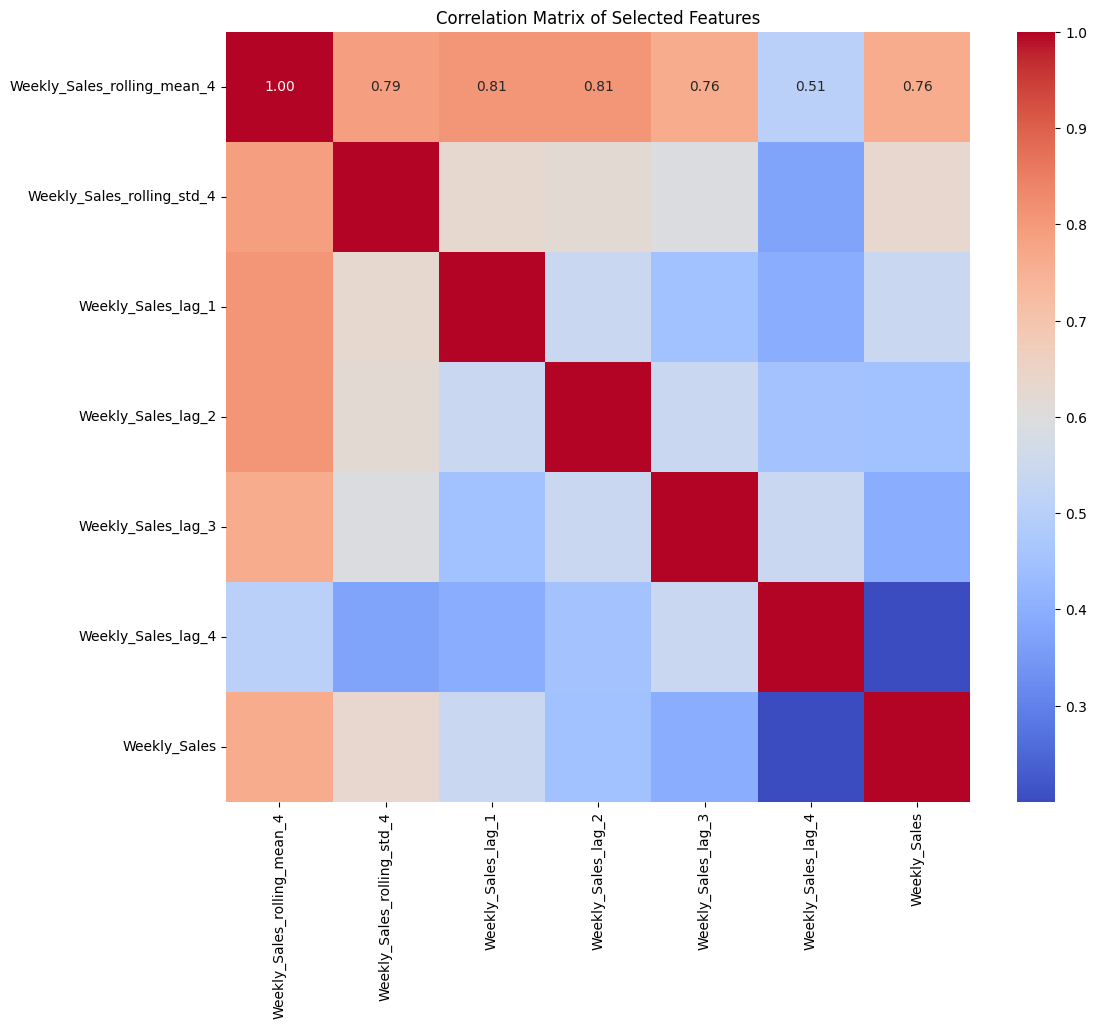

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = data_store_1.corr()

# Correlation with target variable
corr_with_target = corr_matrix['Weekly_Sales'].sort_values(ascending=False)
print("Correlation with Weekly_Sales:\n", corr_with_target)

# Select features with correlation > 0.1 or < -0.1, excluding the target itself
selected_features = corr_with_target[abs(corr_with_target) > 0.1].drop('Weekly_Sales').index.tolist()

print("Selected features:", selected_features)

# Plot the correlation matrix of only the selected features + target
plt.figure(figsize=(12, 10))
sns.heatmap(data_store_1[selected_features + ['Weekly_Sales']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()


In [ ]:
# Split into features and target
selected_features = [f for f in selected_features if f != "Date"]

X = data_store_1[selected_features]
y = data_store_1['Weekly_Sales']

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Best parameters already known
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit model
rf.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"RMSE: {rmse_rf}")
print(f"R2 Score: {r2_rf}")


Random Forest Results:
RMSE: 3345.781572653595
R2 Score: 0.9861450611420474


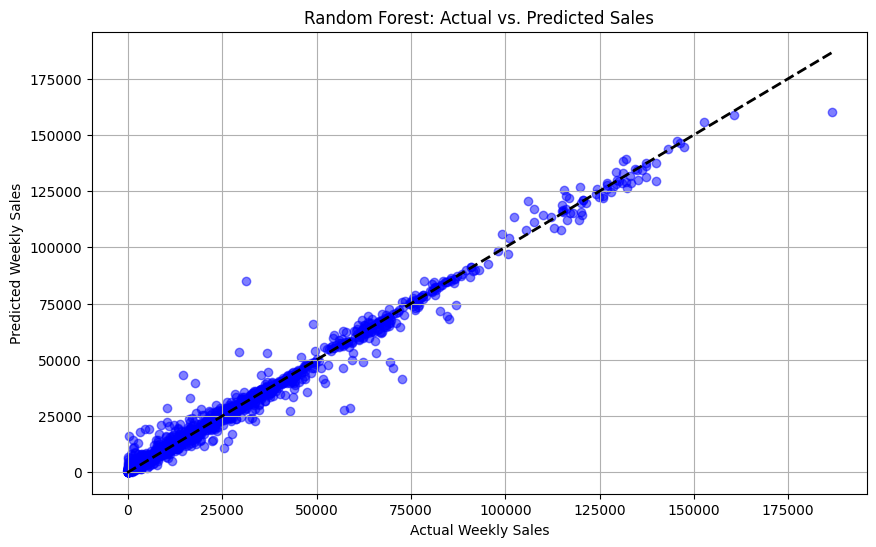

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Random Forest: Actual vs. Predicted Sales')
plt.grid(True)
plt.show()

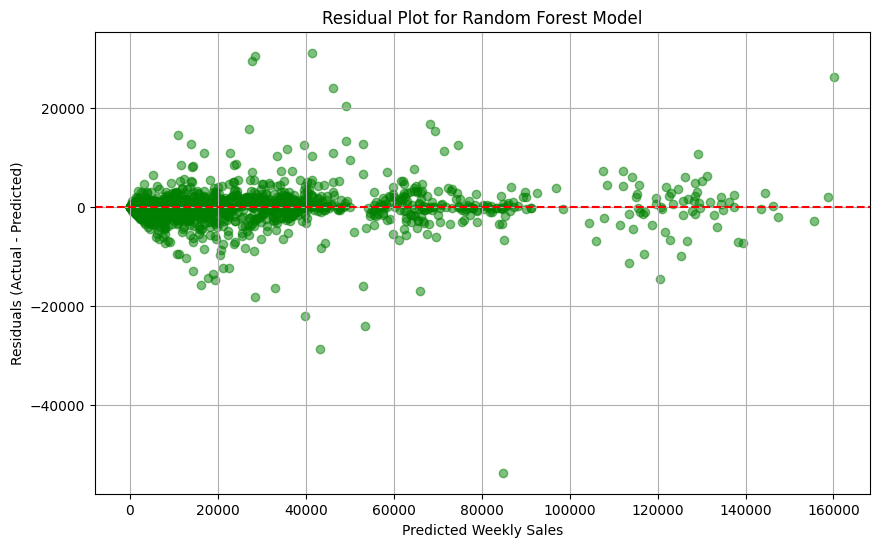

In [ ]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weekly Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Random Forest Model')
plt.grid(True)
plt.show()

In [ ]:
import shap

# Load your trained RF model (or use best_rf from your training)
model = rf

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train_scaled)  # Use scaled training data

# Calculate SHAP values for test set
shap_values = explainer(X_test_scaled)

# Optional: For faster results, use a subset of data
# shap_values = explainer(X_test_scaled[:100])  # First 100 samples

/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|===================| 2046/2048 [05:21<00:00]        

In [ ]:
shap_values.feature_names = selected_features

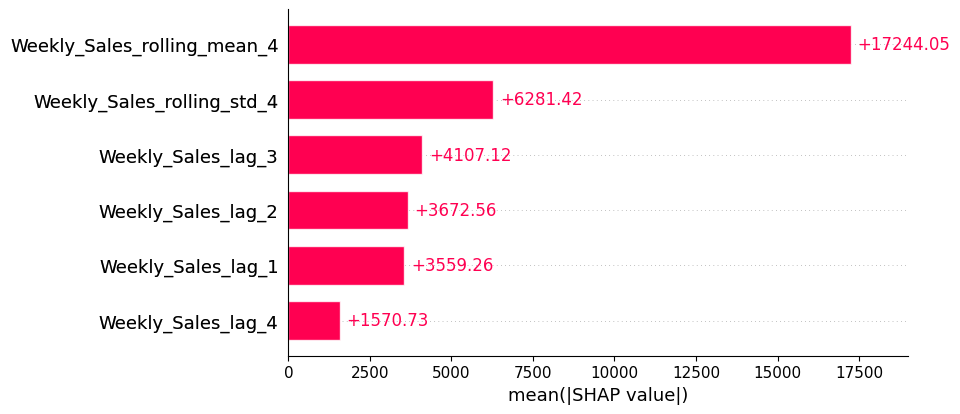

In [ ]:
plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values, max_display=15)  # Top 15 features
# plt.title("Global Feature Importance (SHAP Values)")
plt.show()

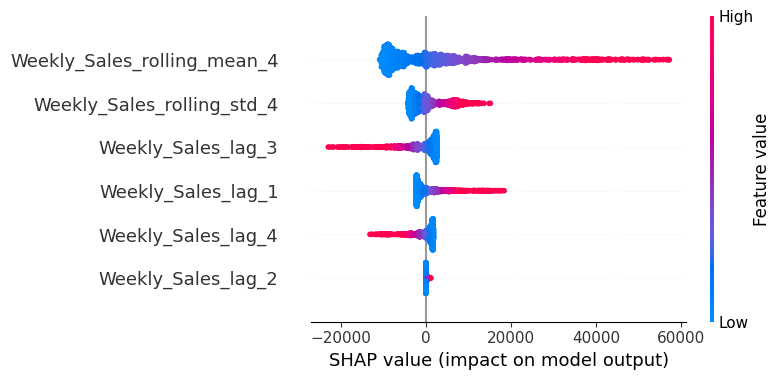

In [ ]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=selected_features)
# plt.title("SHAP Summary Plot")
# plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

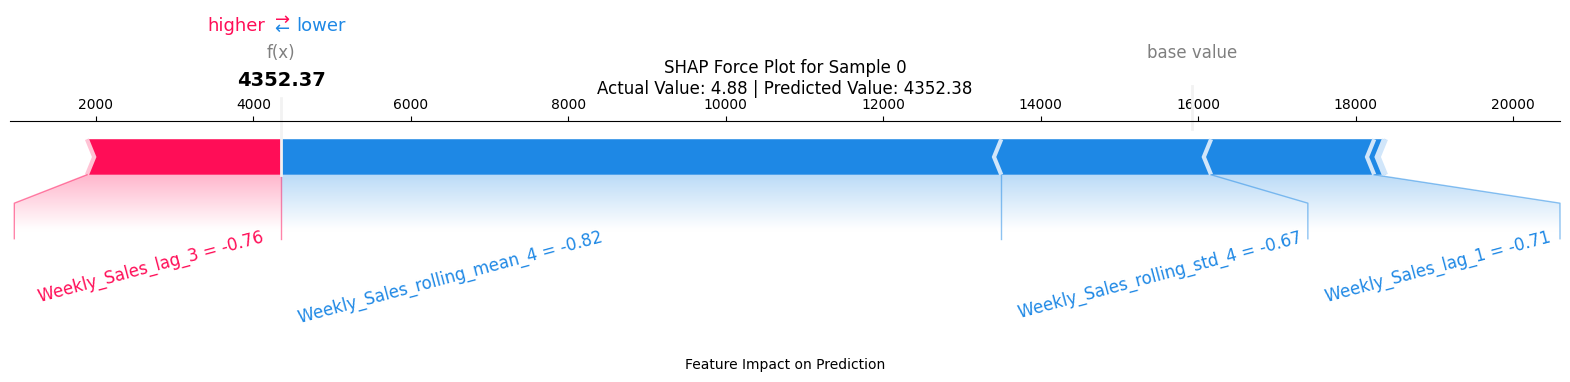

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shap

# For a single prediction (e.g., first test sample)
sample_idx = 0  # You can change this to any index you want to analyze

# Create the force plot with improved formatting
plt.figure(figsize=(12, 6))
shap.force_plot(
    base_value=np.round(explainer.expected_value, 2),  # Model's average prediction
    shap_values=np.round(shap_values.values[sample_idx], 2),  # SHAP values for this sample
    features=np.round(X_test_scaled[sample_idx], 2),  # Feature values for this sample
    feature_names=selected_features,  # Your feature names
    matplotlib=True,  # Use matplotlib instead of Javascript
    show=False,  # Don't show immediately (let us customize first)
    text_rotation=15,  # Rotate feature names for better readability
    contribution_threshold=0.05  # Only show features contributing >5% to prediction
)

# Customize the plot
plt.title(f"SHAP Force Plot for Sample {sample_idx}\n"
          f"Actual Value: {y_test.iloc[sample_idx]:.2f} | "
          f"Predicted Value: {model.predict(X_test_scaled[sample_idx:sample_idx+1])[0]:.2f}",
          fontsize=12, pad=20)
plt.xlabel("Feature Impact on Prediction", fontsize=10)
# plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Set hyperparameters manually (same as your dictionary)
xgb_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 300,
    'subsample': 0.8,
    'random_state': 42
}

# Train XGBoost directly without GridSearchCV
xgb = XGBRegressor(**xgb_params)
xgb.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluate
print("\nXGBoost Results:")
print(f"Used Parameters: {xgb_params}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred_xgb):.4f}")



XGBoost Results:
Used Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8, 'random_state': 42}
RMSE: 2491.1139
R2 Score: 0.9923


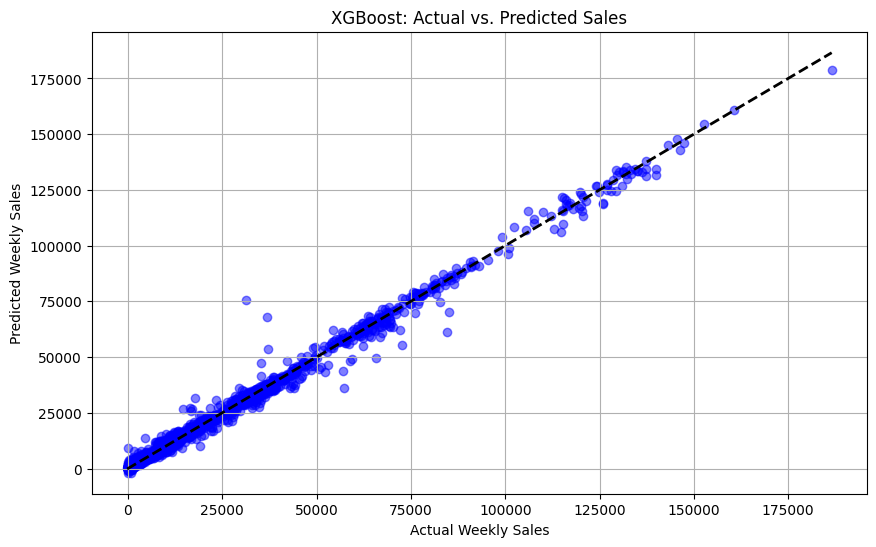

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('XGBoost: Actual vs. Predicted Sales')
plt.grid(True)
plt.show()

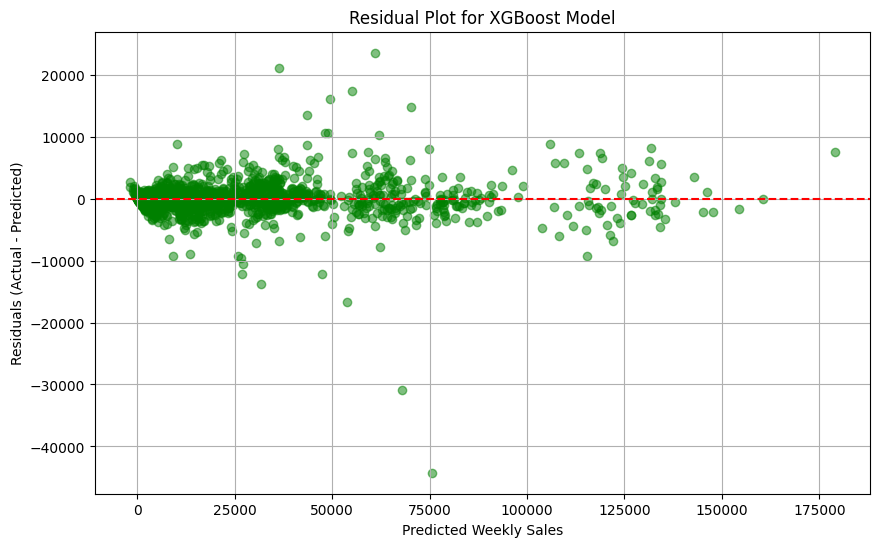

In [ ]:

plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_xgb
plt.scatter(y_pred_xgb, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weekly Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for XGBoost Model')
plt.grid(True)
plt.show()

In [ ]:
import shap

# Load your trained XGBoost model
model = xgb

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train_scaled)  # Use scaled training data

# Calculate SHAP values for test set
shap_values = explainer(X_test_scaled)

# Optional: For faster results, use a subset of data
# shap_values = explainer(X_test_scaled[:100])  # First 100 samples

 99%|===================| 2030/2048 [00:51<00:00]        

In [ ]:
shap_values.feature_names = selected_features

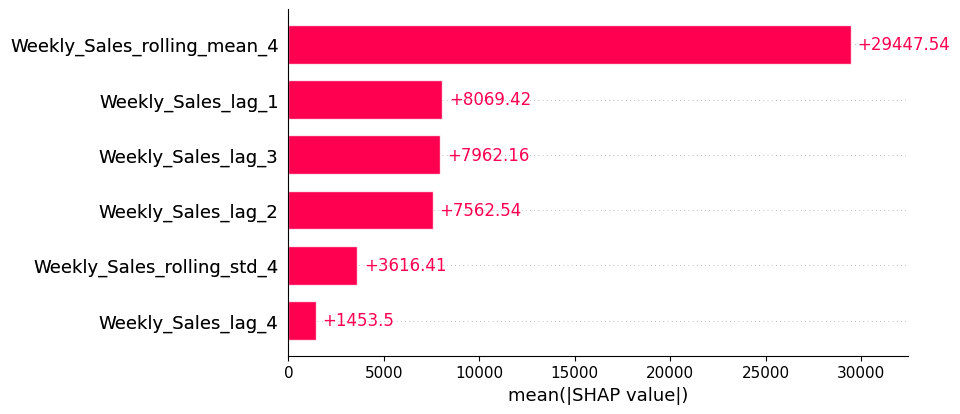

In [ ]:
plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values, max_display=15)  # Top 15 features
# plt.title("Global Feature Importance (SHAP Values)")
plt.show()

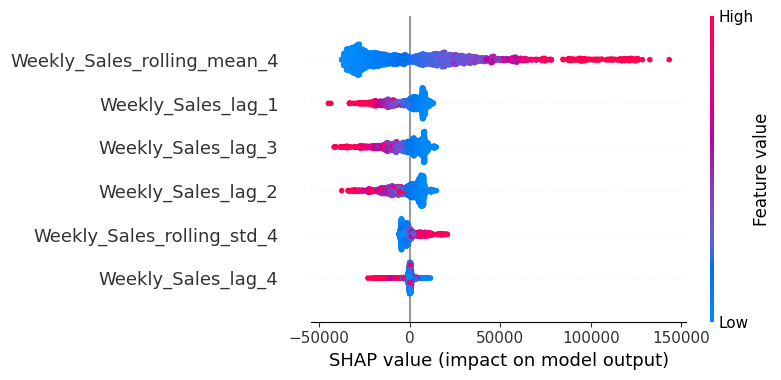

In [ ]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=selected_features)
# plt.title("SHAP Summary Plot")
# plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

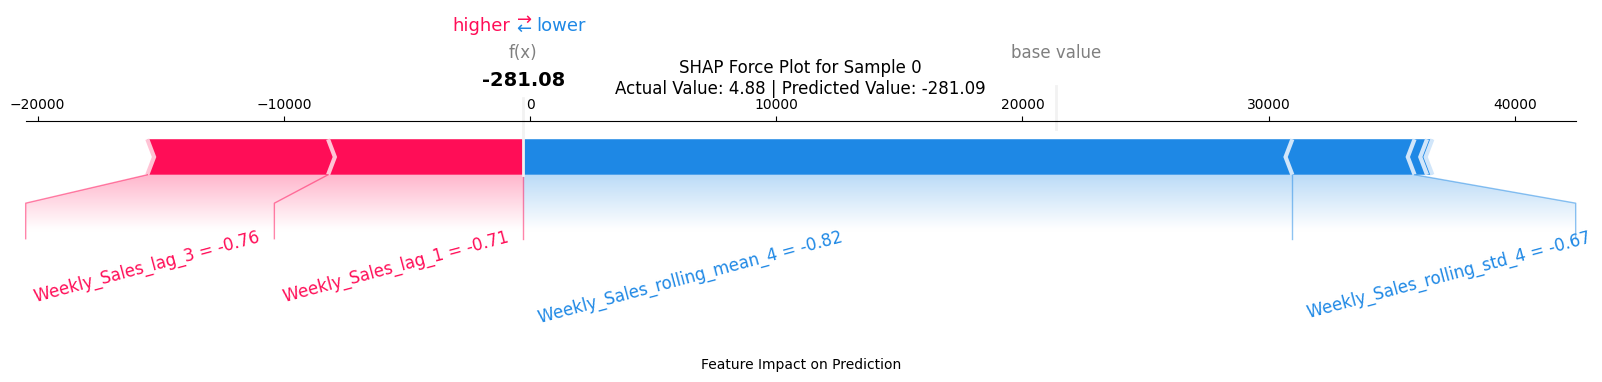

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shap

# For a single prediction (e.g., first test sample)
sample_idx = 0  # You can change this to any index you want to analyze

# Create the force plot with improved formatting
plt.figure(figsize=(12, 6))
shap.force_plot(
    base_value=np.round(explainer.expected_value, 2),  # Model's average prediction
    shap_values=np.round(shap_values.values[sample_idx], 2),  # SHAP values for this sample
    features=np.round(X_test_scaled[sample_idx], 2),  # Feature values for this sample
    feature_names=selected_features,  # Your feature names
    matplotlib=True,  # Use matplotlib instead of Javascript
    show=False,  # Don't show immediately (let us customize first)
    text_rotation=15,  # Rotate feature names for better readability
    contribution_threshold=0.05  # Only show features contributing >5% to prediction
)

# Customize the plot
plt.title(f"SHAP Force Plot for Sample {sample_idx}\n"
          f"Actual Value: {y_test.iloc[sample_idx]:.2f} | "
          f"Predicted Value: {model.predict(X_test_scaled[sample_idx:sample_idx+1])[0]:.2f}",
          fontsize=12, pad=20)
plt.xlabel("Feature Impact on Prediction", fontsize=10)
# plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Best parameters already known
ada = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.1,
    loss='exponential',
    random_state=42
)

# Fit model
ada.fit(X_train_scaled, y_train)

# Predict
y_pred_ada = ada.predict(X_test_scaled)

# Evaluate
rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
r2_ada = r2_score(y_test, y_pred_ada)

print("\nAdaBoost Results:")
print(f"RMSE: {rmse_ada}")
print(f"R2 Score: {r2_ada}")



AdaBoost Results:
RMSE: 12139.428159803629
R2 Score: 0.817607950913691


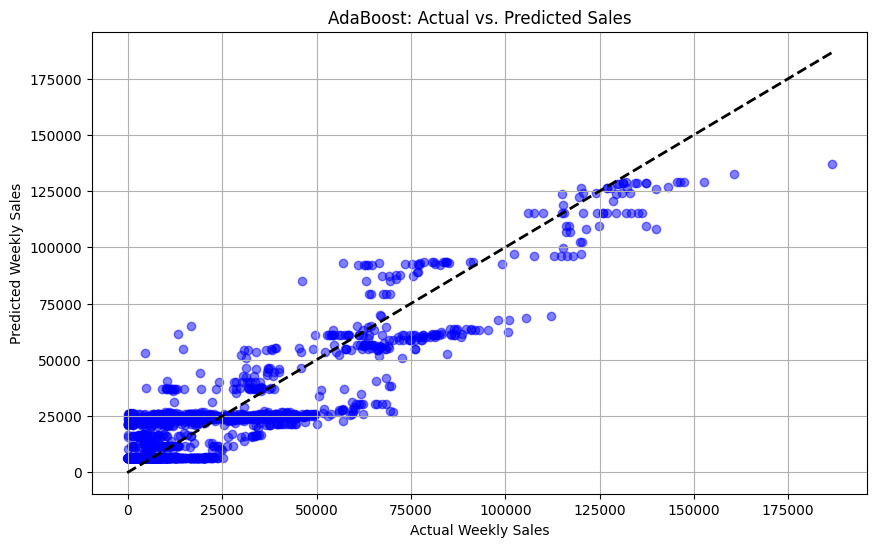

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ada, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('AdaBoost: Actual vs. Predicted Sales')
plt.grid(True)
plt.show()


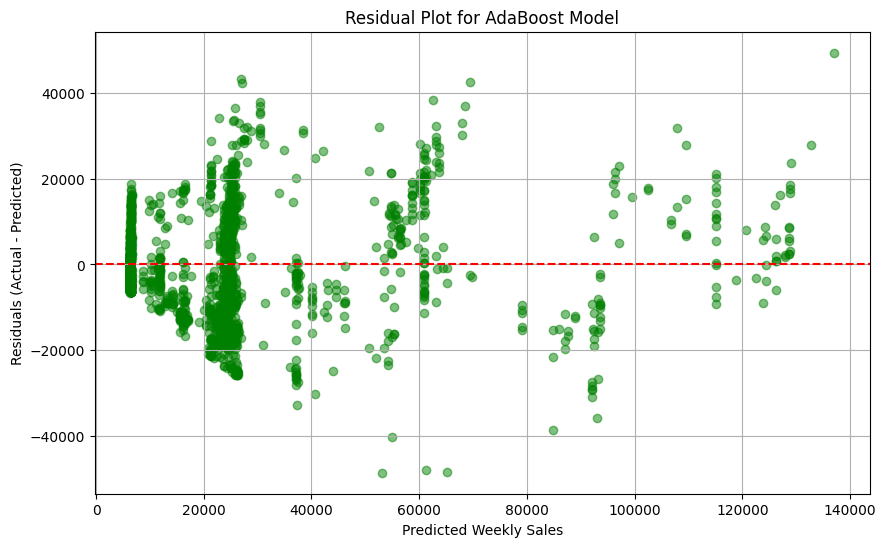

In [ ]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_ada
plt.scatter(y_pred_ada, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weekly Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for AdaBoost Model')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Best parameters already known
gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

# Fit model
gb.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb.predict(X_test_scaled)

# Evaluate
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Results:")
print(f"RMSE: {rmse_gb}")
print(f"R2 Score: {r2_gb}")



Gradient Boosting Results:
RMSE: 2804.414405825377
R2 Score: 0.9902659444019994


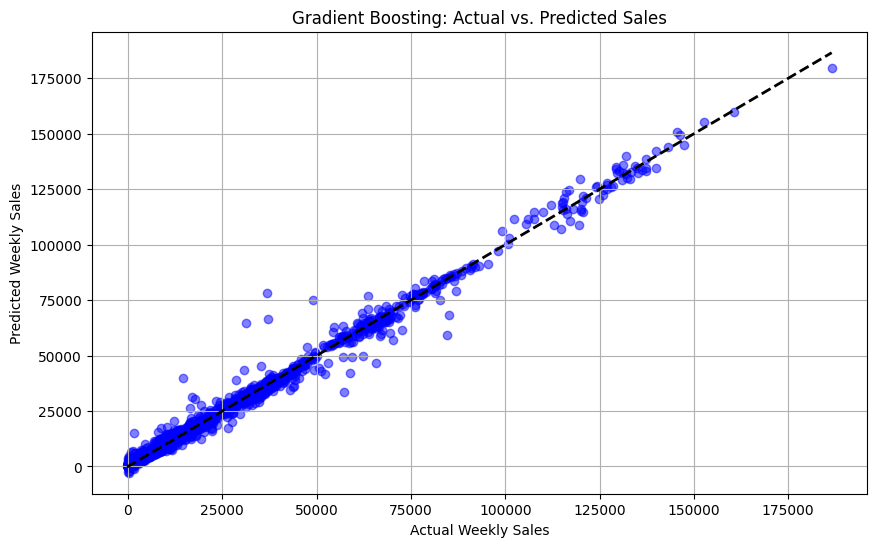

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Gradient Boosting: Actual vs. Predicted Sales')
plt.grid(True)
plt.show()

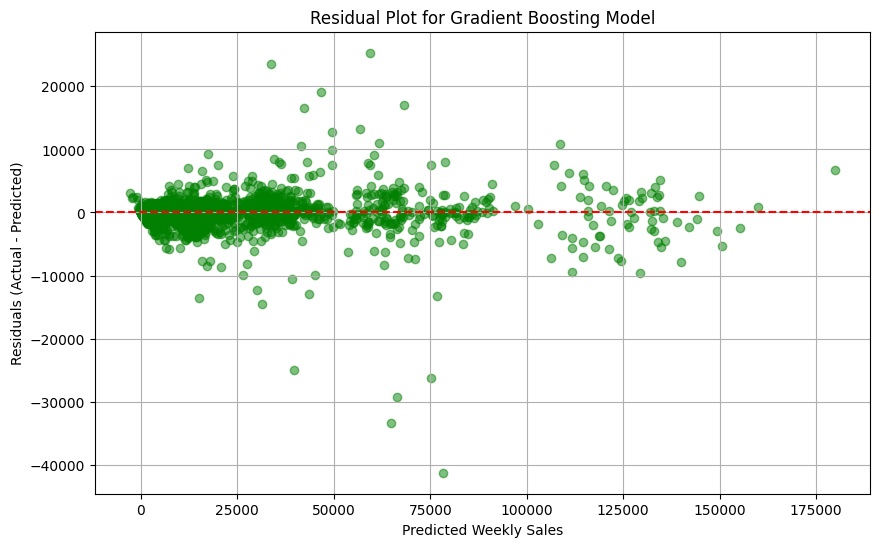

In [ ]:


plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_gb
plt.scatter(y_pred_gb, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weekly Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Gradient Boosting Model')
plt.grid(True)
plt.show()

In [ ]:
import shap

model = gb

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train_scaled)  # Use scaled training data

# Calculate SHAP values for test set
shap_values = explainer(X_test_scaled, check_additivity=False)

# Optional: For faster results, use a subset of data
# shap_values = explainer(X_test_scaled[:100])  # First 100 samples

 98%|===================| 2009/2048 [00:46<00:00]        

In [ ]:
shap_values.feature_names = selected_features

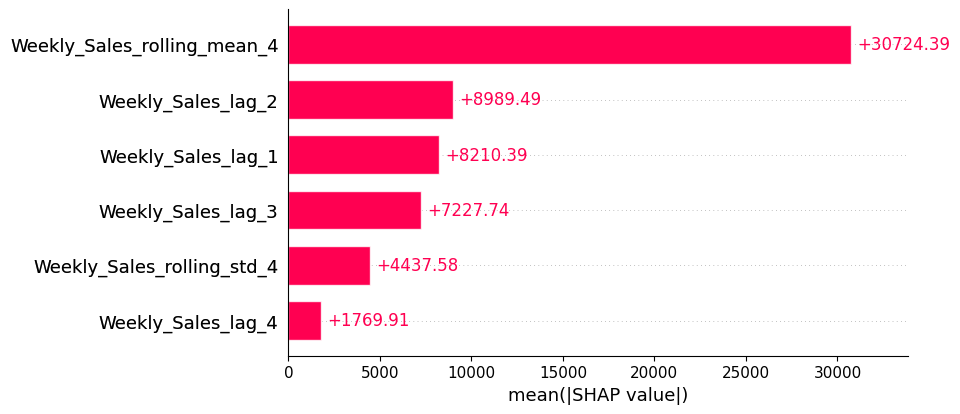

In [ ]:
plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values, max_display=15)  # Top 15 features
# plt.title("Global Feature Importance (SHAP Values)")
plt.show()

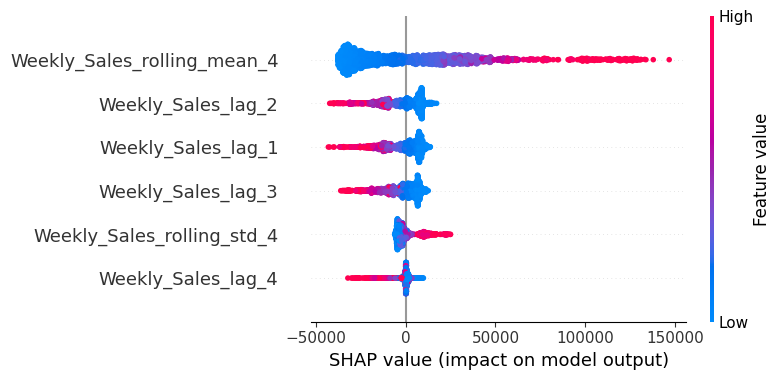

In [ ]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=selected_features)
# plt.title("SHAP Summary Plot")
# plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

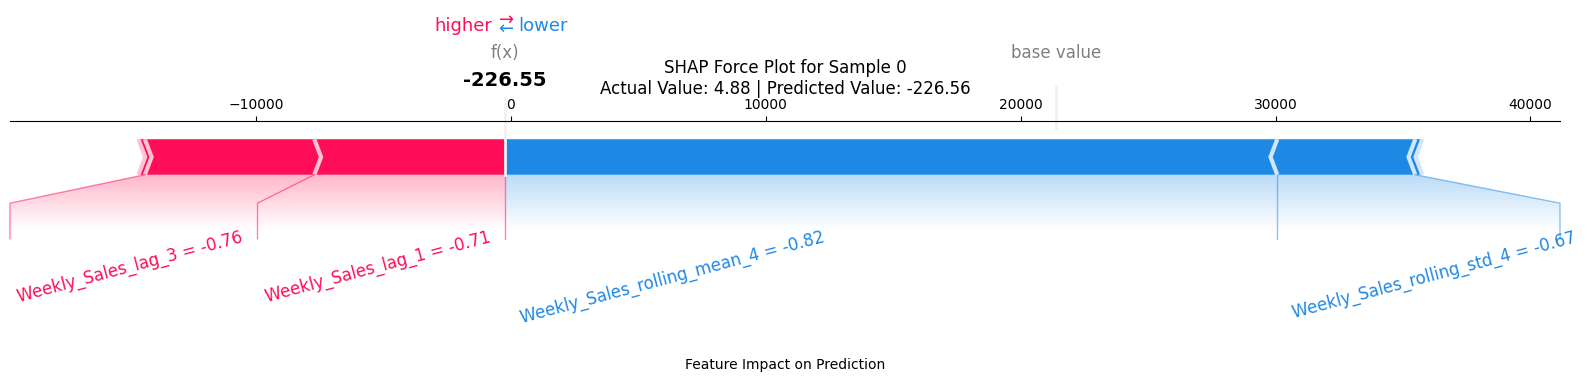

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shap

# For a single prediction (e.g., first test sample)
sample_idx = 0  # You can change this to any index you want to analyze

# Create the force plot with improved formatting
plt.figure(figsize=(12, 6))
shap.force_plot(
    base_value=np.round(explainer.expected_value, 2),  # Model's average prediction
    shap_values=np.round(shap_values.values[sample_idx], 2),  # SHAP values for this sample
    features=np.round(X_test_scaled[sample_idx], 2),  # Feature values for this sample
    feature_names=selected_features,  # Your feature names
    matplotlib=True,  # Use matplotlib instead of Javascript
    show=False,  # Don't show immediately (let us customize first)
    text_rotation=15,  # Rotate feature names for better readability
    contribution_threshold=0.05  # Only show features contributing >5% to prediction
)

# Customize the plot
plt.title(f"SHAP Force Plot for Sample {sample_idx}\n"
          f"Actual Value: {y_test.iloc[sample_idx]:.2f} | "
          f"Predicted Value: {model.predict(X_test_scaled[sample_idx:sample_idx+1])[0]:.2f}",
          fontsize=12, pad=20)
plt.xlabel("Feature Impact on Prediction", fontsize=10)
# plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Using best parameters found earlier
svr = SVR(
    kernel='linear',
    C=10,
    epsilon=0.5
)

# Fit model
svr.fit(X_train_scaled, y_train)

# Predict
y_pred_svr = svr.predict(X_test_scaled)

# Evaluate
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSVR Results:")
print(f"RMSE: {rmse_svr}")
print(f"R2 Score: {r2_svr}")



SVR Results:
RMSE: 18704.603222179347
R2 Score: 0.5669815074386066


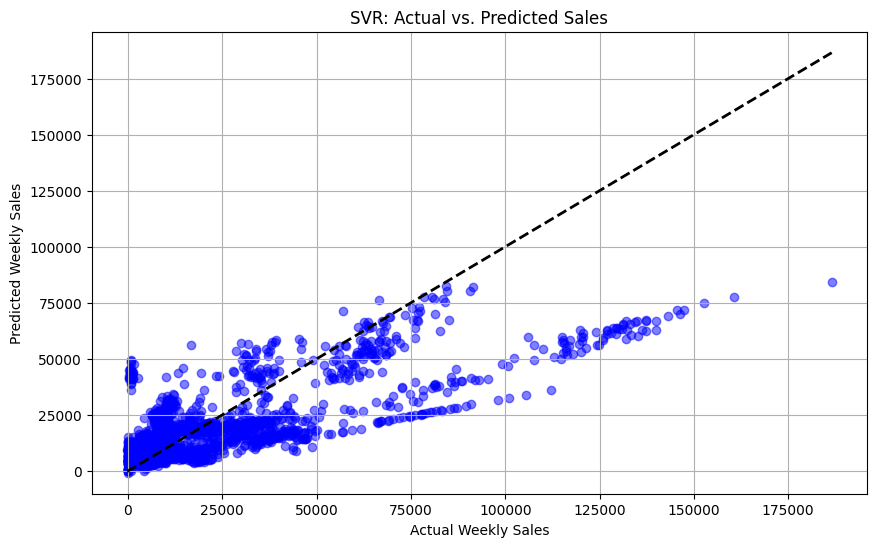

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('SVR: Actual vs. Predicted Sales')
plt.grid(True)
plt.show()

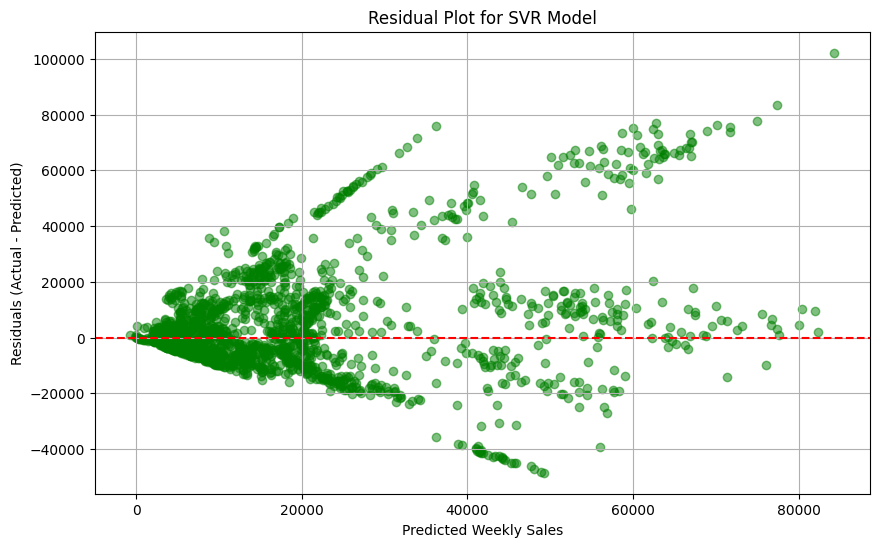

In [ ]:


plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_svr
plt.scatter(y_pred_svr, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weekly Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for SVR Model')
plt.grid(True)
plt.show()

In [ ]:
import shap

# Load your trained SVR model
model = svr

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train_scaled)  # Use scaled training data

# Calculate SHAP values for test set
shap_values = explainer(X_test_scaled)

# Optional: For faster results, use a subset of data
# shap_values = explainer(X_test_scaled[:100])  # First 100 samples

In [ ]:
shap_values.feature_names = selected_features

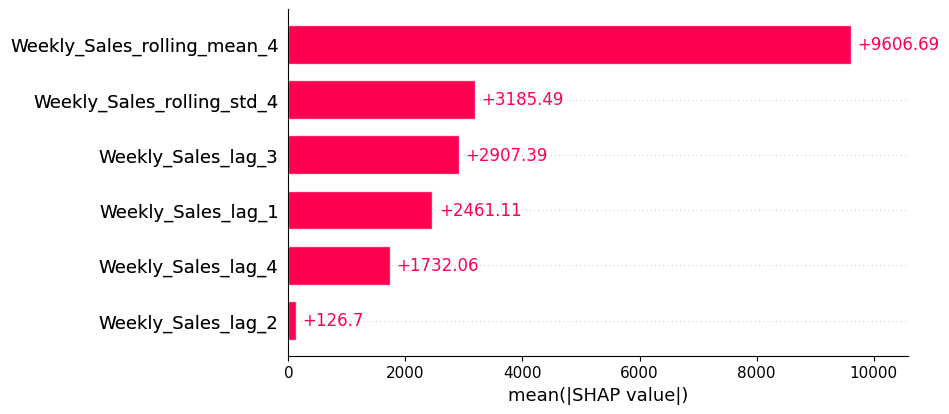

In [ ]:
plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values, max_display=15)  # Top 15 features
# plt.title("Global Feature Importance (SHAP Values)")
plt.show()

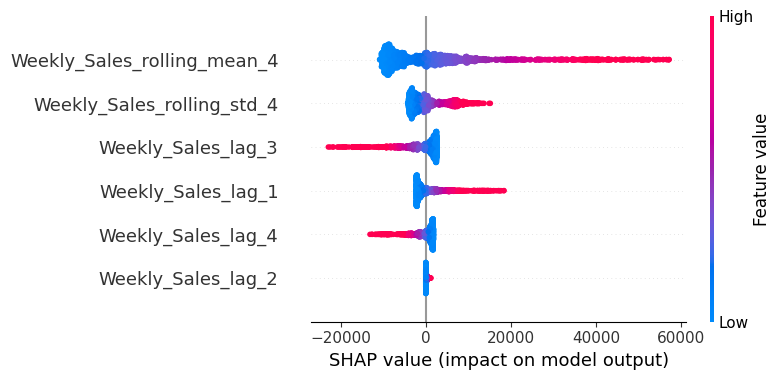

In [ ]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=selected_features)
# plt.title("SHAP Summary Plot")
# plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

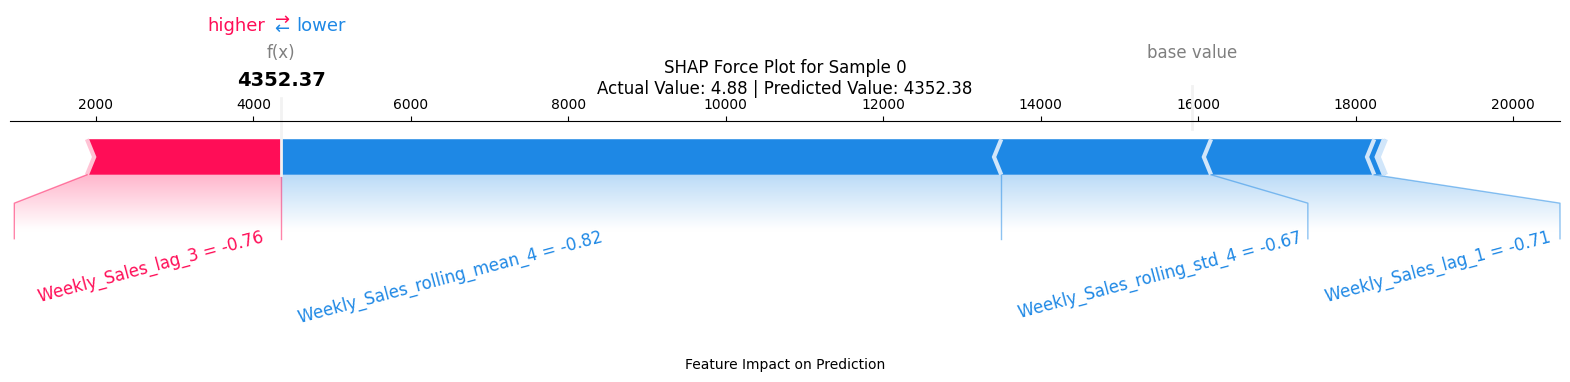

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shap

# For a single prediction (e.g., first test sample)
sample_idx = 0  # You can change this to any index you want to analyze

# Create the force plot with improved formatting
plt.figure(figsize=(12, 6))
shap.force_plot(
    base_value=np.round(explainer.expected_value, 2),  # Model's average prediction
    shap_values=np.round(shap_values.values[sample_idx], 2),  # SHAP values for this sample
    features=np.round(X_test_scaled[sample_idx], 2),  # Feature values for this sample
    feature_names=selected_features,  # Your feature names
    matplotlib=True,  # Use matplotlib instead of Javascript
    show=False,  # Don't show immediately (let us customize first)
    text_rotation=15,  # Rotate feature names for better readability
    contribution_threshold=0.05  # Only show features contributing >5% to prediction
)

# Customize the plot
plt.title(f"SHAP Force Plot for Sample {sample_idx}\n"
          f"Actual Value: {y_test.iloc[sample_idx]:.2f} | "
          f"Predicted Value: {model.predict(X_test_scaled[sample_idx:sample_idx+1])[0]:.2f}",
          fontsize=12, pad=20)
plt.xlabel("Feature Impact on Prediction", fontsize=10)
# plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Example: Best parameters found earlier (adjust if different)
mlp = MLPRegressor(
    hidden_layer_sizes=(100,),     # Example best layer size
    activation='relu',             # Example activation
    alpha=0.001,                   # Example alpha
    learning_rate='adaptive',     # Example learning rate
    max_iter=1000,
    random_state=42
)

# Fit model
mlp.fit(X_train_scaled, y_train)

# Predict
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluate
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)

print("\nNeural Network (MLP) Results:")
print(f"RMSE: {rmse_mlp}")
print(f"R2 Score: {r2_mlp}")



Neural Network (MLP) Results:
RMSE: 1326.8807216377502
R2 Score: 0.9978209198114962


/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


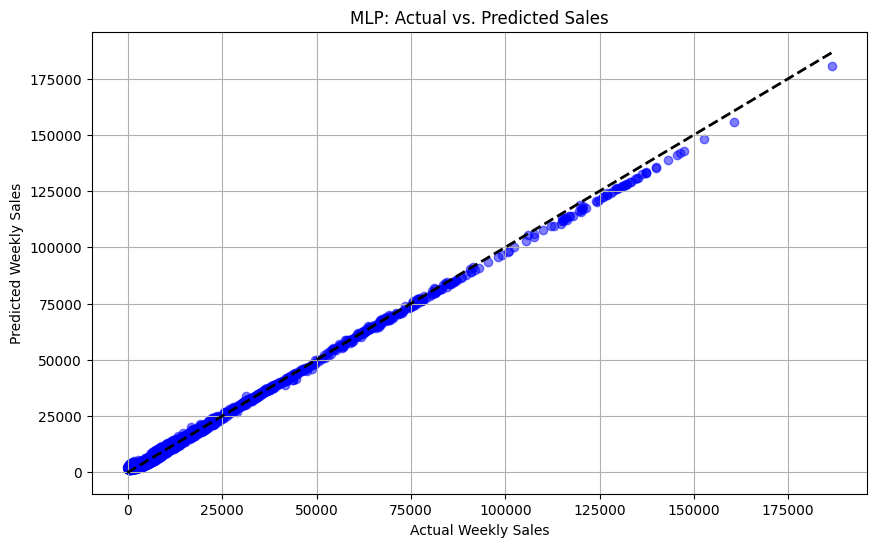

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('MLP: Actual vs. Predicted Sales')
plt.grid(True)
plt.show()

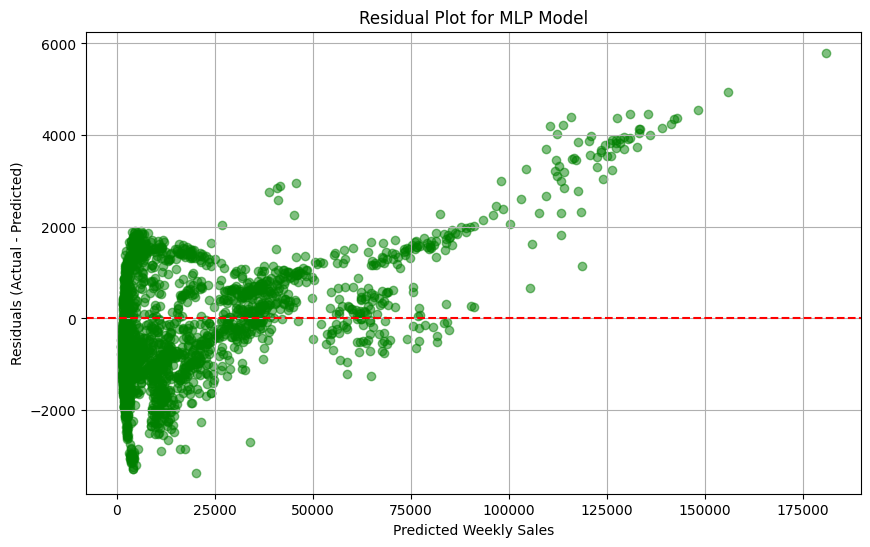

In [ ]:


plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_mlp
plt.scatter(y_pred_mlp, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weekly Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for MLP Model')
plt.grid(True)
plt.show()

In [ ]:
# Collect all model results
models = {
    'Random Forest': rf,
    'XGBoost': xgb,
    'AdaBoost': ada,
    'Gradient Boosting': gb,
    'SVR': svr,
    'Neural Network': mlp
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
results_df.sort_values('RMSE')


Model Comparison:


Model          RMSE  R2 Score
5     Neural Network   1326.880722  0.997821
1            XGBoost   2491.113897  0.992319
3  Gradient Boosting   2804.414406  0.990266
0      Random Forest   3345.781573  0.986145
2           AdaBoost  12139.428160  0.817608
4                SVR  18704.603222  0.566982

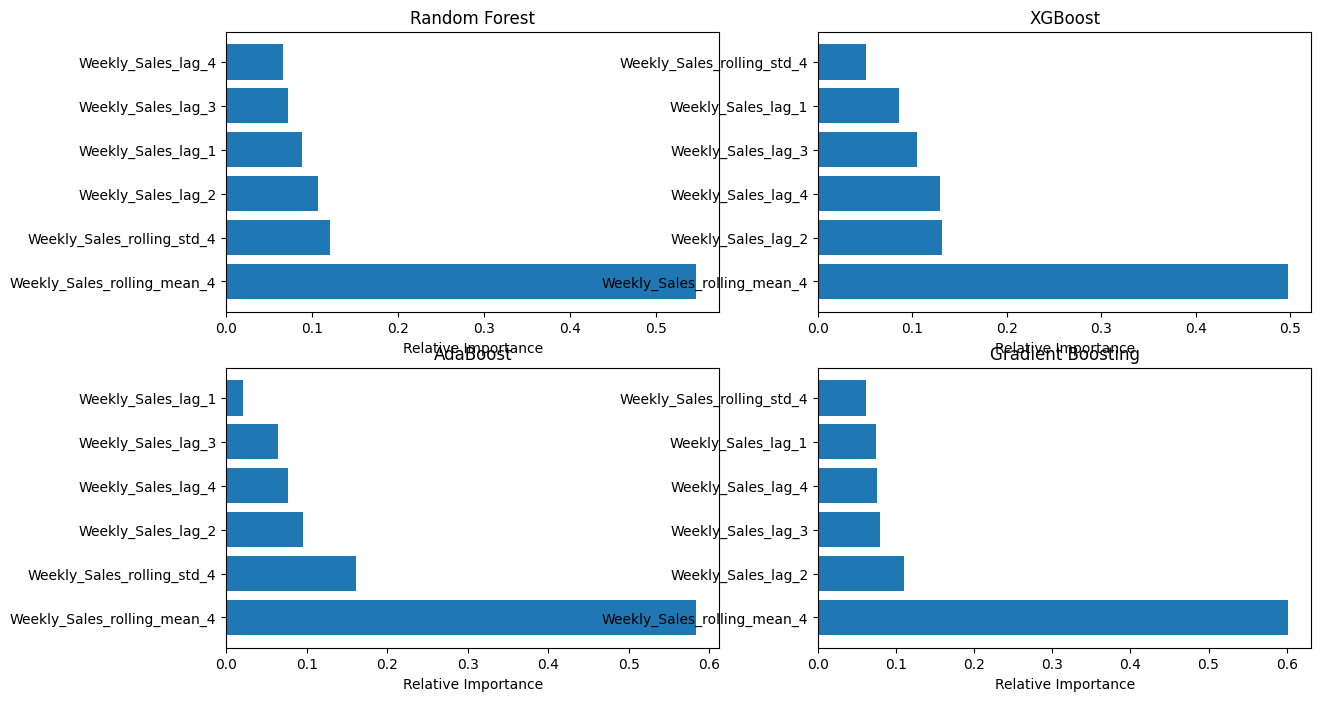

In [ ]:
# Plot feature importance for tree-based models
plt.figure(figsize=(14, 8))
for i, (name, model) in enumerate(models.items()):
    if hasattr(model, 'feature_importances_'):
        plt.subplot(2, 2, i+1)
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.title(name)
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [selected_features[i] for i in indices])
        plt.xlabel('Relative Importance')
# plt.tight_layout()
plt.show()

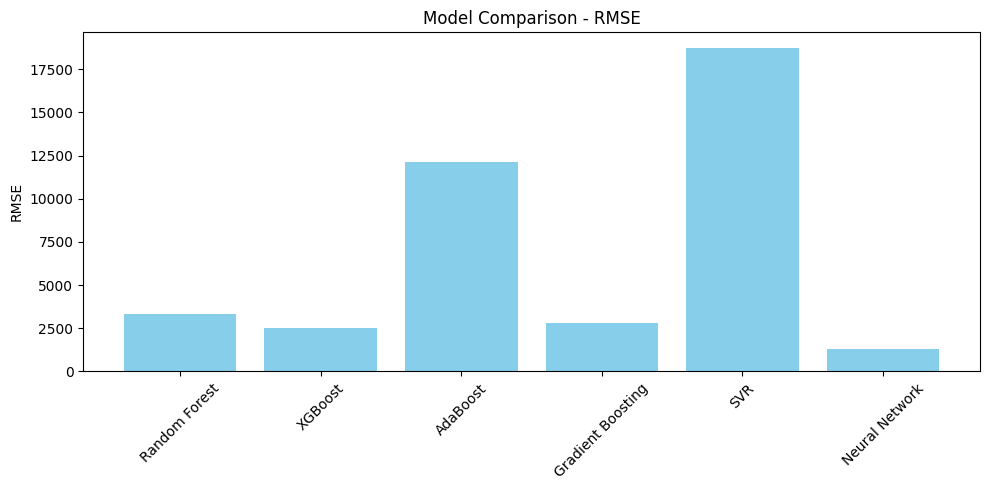

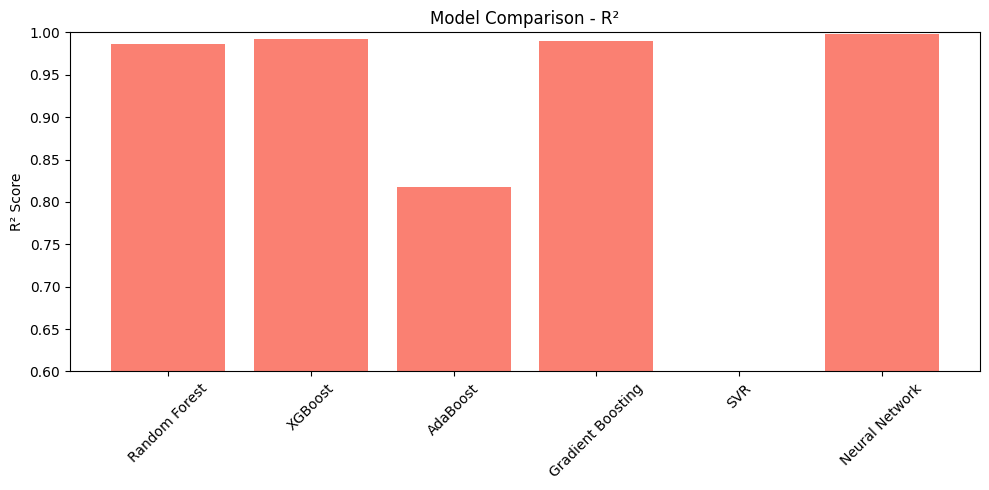

In [ ]:
metrics = ['RMSE', 'R2']
models = ['Random Forest', 'XGBoost', 'AdaBoost', 'Gradient Boosting', 'SVR', 'Neural Network']
rmse_values = [np.sqrt(mean_squared_error(y_test, y_pred_rf)),
               np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
               np.sqrt(mean_squared_error(y_test, y_pred_ada)),
               np.sqrt(mean_squared_error(y_test, y_pred_gb)),
               np.sqrt(mean_squared_error(y_test, y_pred_svr)),
               np.sqrt(mean_squared_error(y_test, y_pred_mlp))]
r2_values = [r2_score(y_test, y_pred_rf),
             r2_score(y_test, y_pred_xgb),
             r2_score(y_test, y_pred_ada),
             r2_score(y_test, y_pred_gb),
             r2_score(y_test, y_pred_svr),
             r2_score(y_test, y_pred_mlp)]


# Plot RMSE
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_values, color='skyblue')
plt.ylabel('RMSE')
plt.title('Model Comparison - RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R²
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values, color='salmon')
plt.ylabel('R² Score')
plt.title('Model Comparison - R²')
plt.xticks(rotation=45)
plt.ylim(0.6, 1)  # R² typically between 0 and 1
plt.tight_layout()
plt.show()

In [ ]:
import joblib
import os

# Create a directory to store models if it doesn't exist
output_dir = "saved_models"
os.makedirs(output_dir, exist_ok=True)


# Dictionary of all trained models
models = {
    'RandomForest': rf,
    'XGBoost': xgb,
    'AdaBoost': ada,
    'GradientBoosting': gb,
    'SVR': svr,
    'MLP': mlp
}

# Save each model and its scaler
for model_name, model in models.items():
    # Save the model
    joblib.dump(model, f'{output_dir}/{model_name}_model.pkl')

    # Save the scaler (same scaler for all models in this case)
    joblib.dump(scaler, f'{output_dir}/{model_name}_scaler.pkl')

    print(f"Saved {model_name} model and scaler.")


Saved RandomForest model and scaler.
Saved XGBoost model and scaler.
Saved AdaBoost model and scaler.
Saved GradientBoosting model and scaler.
Saved SVR model and scaler.
Saved MLP model and scaler.


In [ ]:
# Example: Load and use a specific model (e.g., RandomForest)
loaded_model = joblib.load(f'{output_dir}/RandomForest_model.pkl')
loaded_scaler = joblib.load(f'{output_dir}/RandomForest_scaler.pkl')

# Sample prediction
sample_data = X_test.iloc[0:1]  # Get one sample
scaled_sample = loaded_scaler.transform(sample_data)
prediction = loaded_model.predict(scaled_sample)
print(f"\nRandomForest prediction: {prediction[0]}")
print(f"Actual value: {y_test.iloc[0]}")


RandomForest prediction: 25.205900000000042
Actual value: 4.88


In [ ]:
import joblib
import os
import pandas as pd

# Define output directory
output_dir = "saved_models"

# Load the trained model and scaler
loaded_model = joblib.load(os.path.join(output_dir, 'MLP_model.pkl'))
loaded_scaler = joblib.load(os.path.join(output_dir, 'MLP_scaler.pkl'))

# Ensure X_test and y_test are defined
if 'X_test' not in locals() or 'y_test' not in locals():
    raise ValueError("X_test and y_test must be defined before running this script.")

# Select sample data
sample_data = X_test.iloc[:100]  # Select first 100 samples
scaled_sample = loaded_scaler.transform(sample_data)

# Make predictions
predictions = loaded_model.predict(scaled_sample)

# Create DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test.iloc[:100].values.flatten(),
    'Predicted': predictions.flatten()
})

# Display the DataFrame
results_df[:40]


Actual      Predicted
0        4.88    1856.635860
1       23.94    1927.325174
2    24606.39   24946.754951
3    28635.06   28599.282730
4     9518.43   10502.327322
5    22566.41   21137.351479
6     7090.86    5543.733169
7    15784.60   16857.701356
8     2755.40    1890.637712
9    33269.22   33417.904136
10   22393.09   22940.535388
11   11695.12   10340.534953
12    7968.85    9228.435535
13    4724.29    3448.269348
14  133213.04  129251.137017
15   91983.47   89995.472801
16   46717.76   45699.130005
17    1769.86    1967.345907
18   28291.68   28392.692748
19    9742.29   11239.106740
20    7696.61    6696.834407
21   74827.84   73311.361250
22   38016.64   38492.962063
23   66780.63   67490.432158
24    3939.12    4677.917434
25   75214.29   75386.875713
26     804.22    1295.898926
27   14332.72   15046.296283
28    2854.73    3298.679520
29   63164.15   62999.164984
30   40940.78   39802.080390
31    3928.25    2697.015347
32    6365.91    7482.979069
33     182.07    1267.078182
34    4987.81    6200.794593
35    1945.42    1640.620852
36   28932.57   28911.404105
37      23.00    1502.443487
38   41069.55   40586.184812
39    9556.80    9380.004017

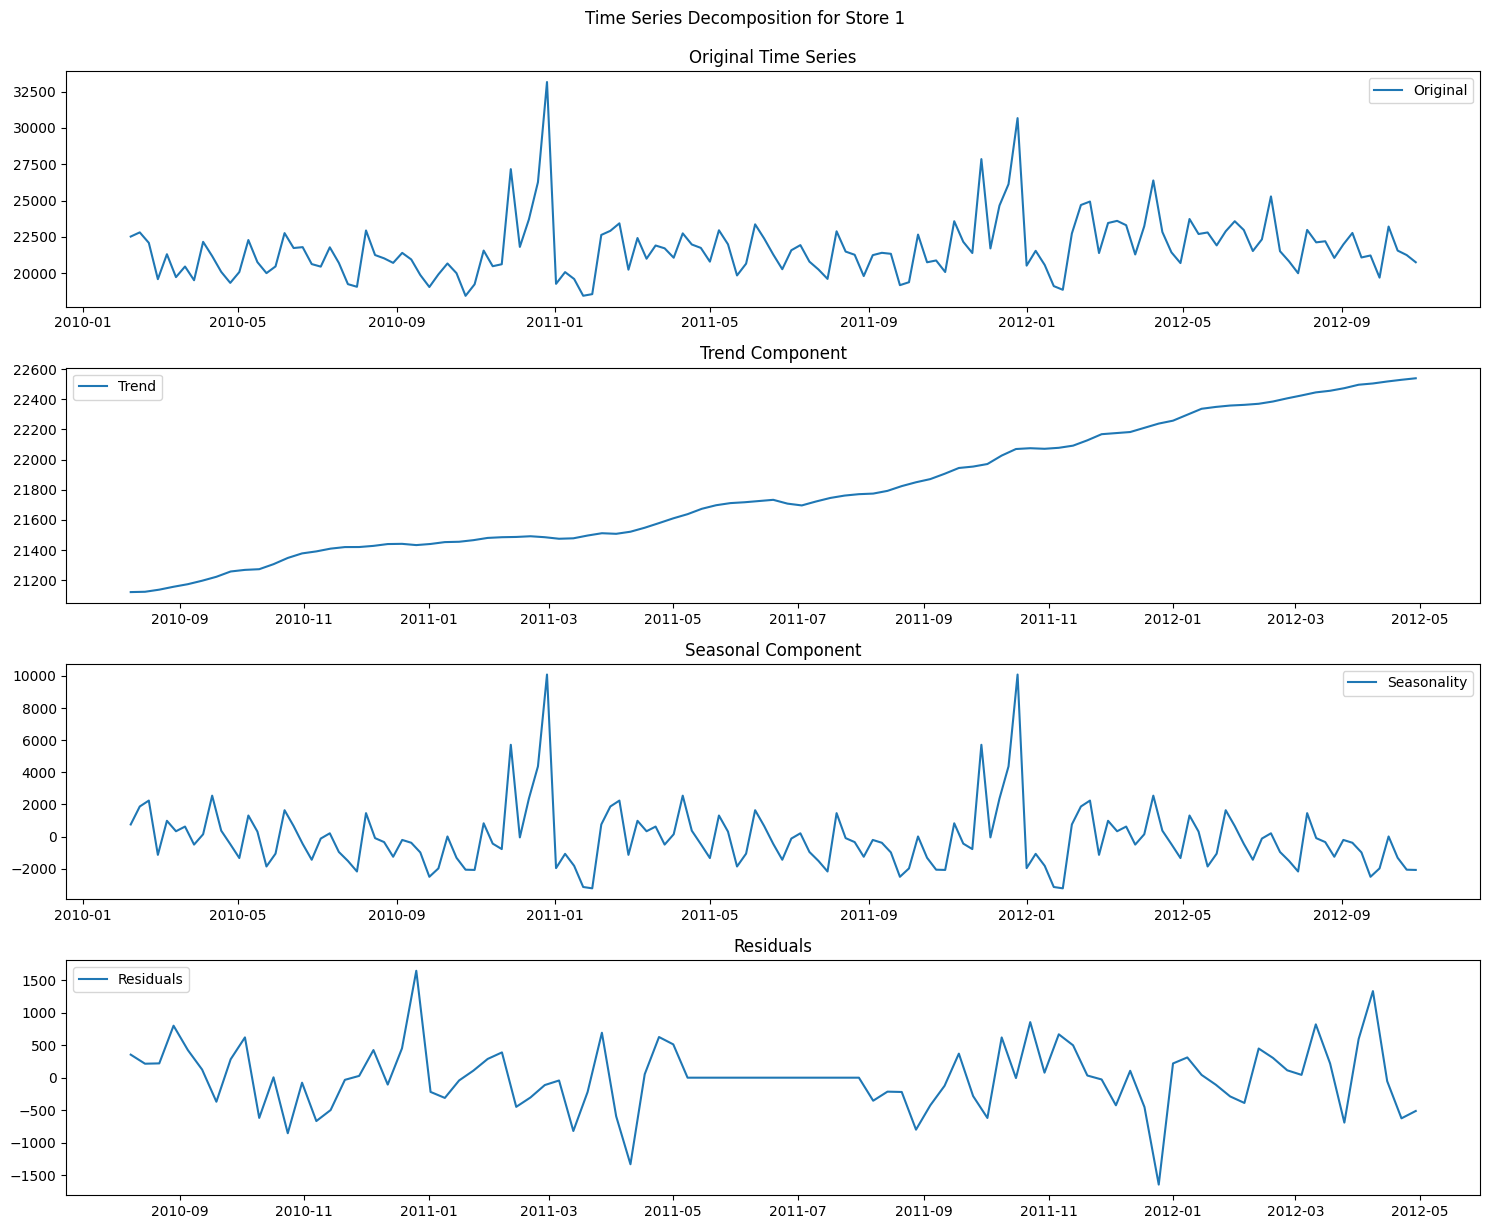

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

def plot_ts_decomposition(store_id):
    store_data = data[data['Store'] == store_id].set_index('Date').sort_index()
    store_weekly = store_data['Weekly_Sales'].resample('W').mean()

    # Decompose the time series
    decomposition = seasonal_decompose(store_weekly, model='additive', period=52)

    # Plot decomposition
    plt.figure(figsize=(15, 12))

    plt.subplot(4, 1, 1)
    plt.plot(store_weekly, label='Original')
    plt.legend(loc='best')
    plt.title('Original Time Series')

    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend Component')

    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.title('Seasonal Component')

    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend(loc='best')
    plt.title('Residuals')

    plt.tight_layout()
    plt.suptitle(f'Time Series Decomposition for Store {store_id}', y=1.02)
    plt.show()

# Plot for a sample store (you can change the store ID)
plot_ts_decomposition(1)

In [ ]:
# Convert 'Date' to datetime if not already done
data['Date'] = pd.to_datetime(data['Date'])

# Extract week number and store in 'Week' column
data['Week'] = data['Date'].dt.isocalendar().week

## Time Series Analysis
Objective: Analyze the time series properties (trend, seasonality, residuals) using seasonal decomposition.



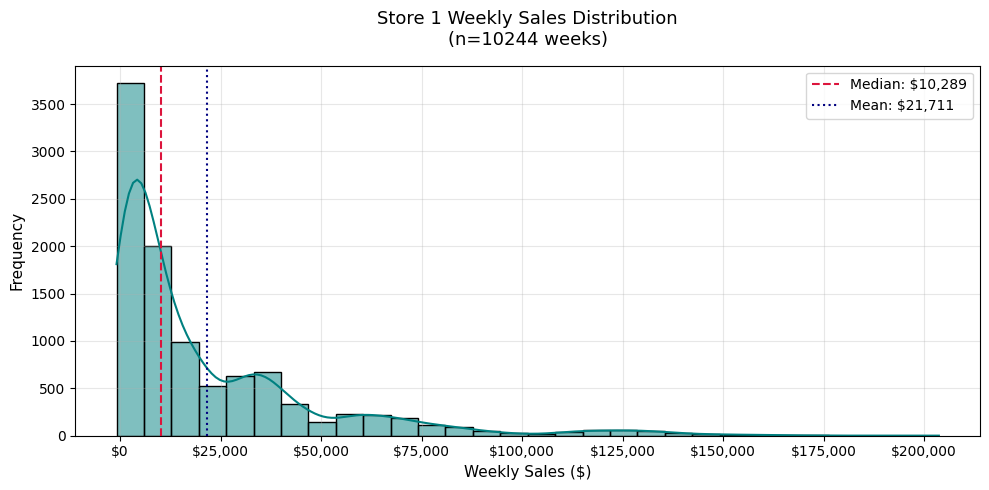

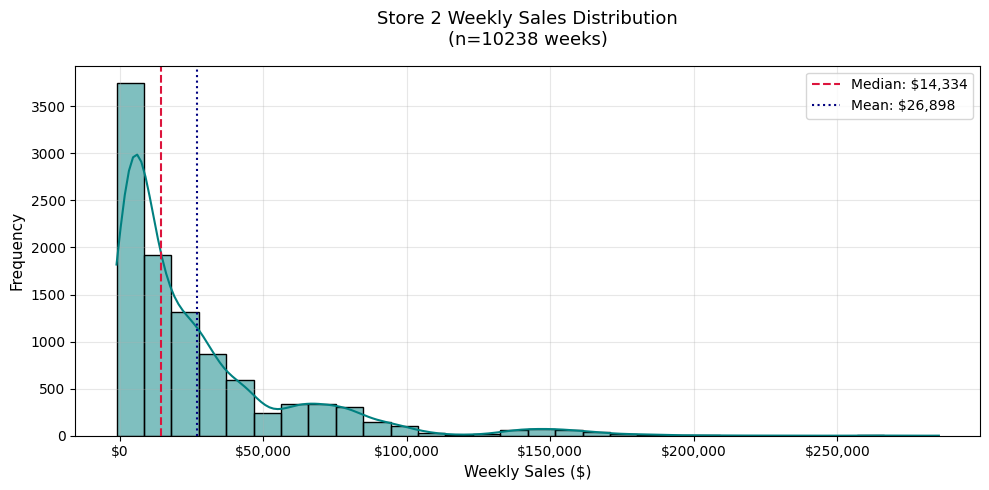

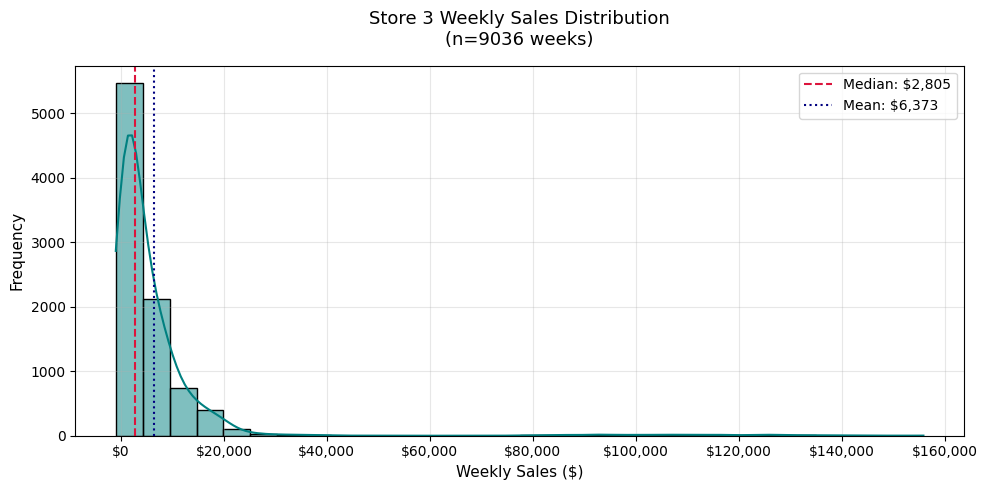

In [ ]:
def plot_individual_store_distributions(data, stores=None, bins=30, figsize=(10, 5)):
    """
    Plot individual distribution plots for each store

    Parameters:
    - data: DataFrame containing the sales data
    - stores: List of store IDs to analyze (if None, plots all stores)
    - bins: Number of bins for histogram
    - figsize: Size of each individual plot
    """
    # Get stores to plot (all stores if None specified)
    if stores is None:
        stores = sorted(data['Store'].unique())

    for store in stores:
        # Filter data for the current store
        store_data = data[data['Store'] == store]

        # Create figure
        plt.figure(figsize=figsize)

        # Create distribution plot
        sns.histplot(data=store_data, x='Weekly_Sales',
                     color='teal', kde=True, bins=bins)

        # Add median line
        median_val = store_data['Weekly_Sales'].median()
        plt.axvline(median_val, color='crimson', linestyle='--',
                    linewidth=1.5, label=f'Median: ${median_val:,.0f}')

        # Add mean line
        mean_val = store_data['Weekly_Sales'].mean()
        plt.axvline(mean_val, color='navy', linestyle=':',
                    linewidth=1.5, label=f'Mean: ${mean_val:,.0f}')

        # Formatting
        plt.title(f'Store {store} Weekly Sales Distribution\n'
                 f'(n={len(store_data)} weeks)', fontsize=13, pad=15)
        plt.xlabel('Weekly Sales ($)', fontsize=11)
        plt.ylabel('Frequency', fontsize=11)
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Format x-axis with dollar signs
        plt.gca().xaxis.set_major_formatter('${x:,.0f}')

        plt.tight_layout()
        plt.show()

# Example usage for all stores:
# plot_individual_store_distributions(data)

# Example usage for specific stores:
plot_individual_store_distributions(data, stores=[1,2,3])

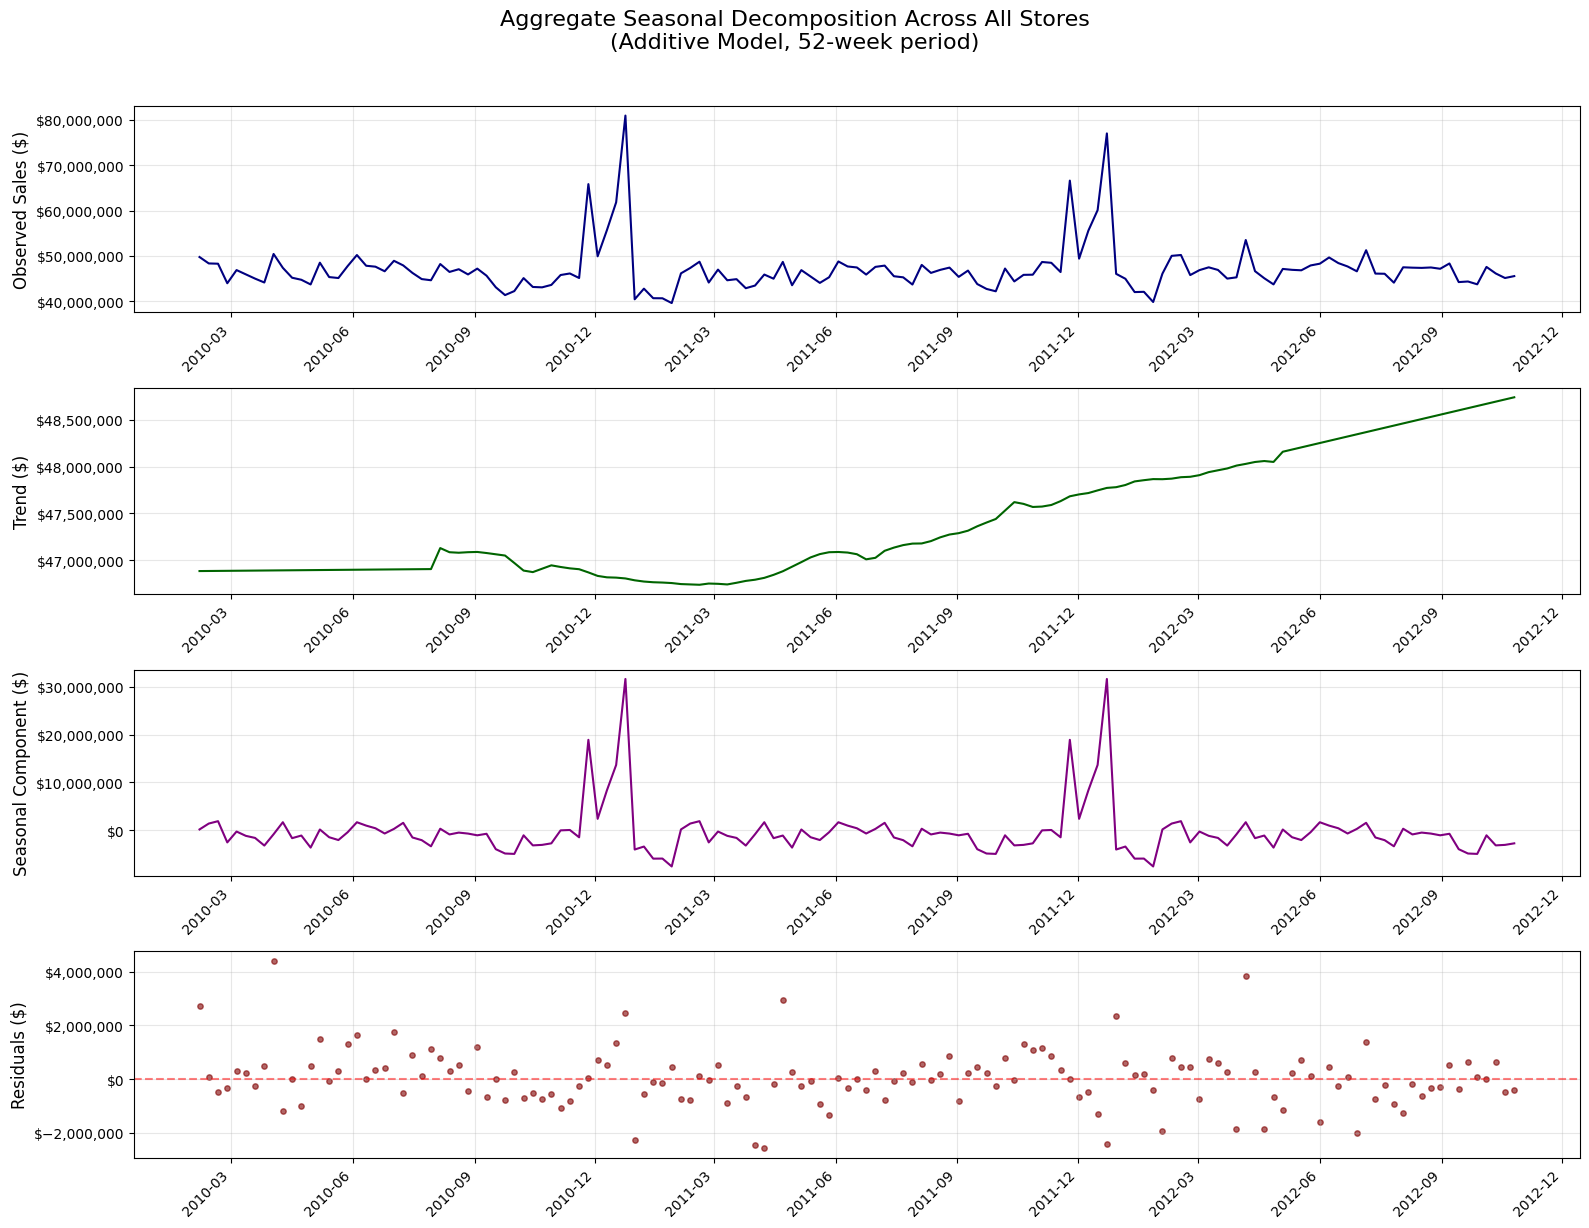


Aggregate Seasonality Analysis:
- Total observed sales: $6,737,218,987
- Average weekly sales: $47,113,419
- Trend range: $46,739,591 to $48,737,768
- Seasonal amplitude: $39,269,748
- Residual stats: mean=28612.22, std=1056948.57


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def analyze_aggregate_seasonality(data, period=52, model='additive'):
    """
    Perform seasonal decomposition on aggregated sales data across all stores

    Parameters:
    - data: DataFrame containing the sales data
    - period: Seasonality period (default: 52 weeks for annual seasonality)
    - model: 'additive' or 'multiplicative' decomposition model
    """
    # Aggregate sales by date across all stores
    agg_data = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

    # Check if we have enough data points
    if len(agg_data) < 2 * period:
        print(f"Insufficient data ({len(agg_data)} points) for {period}-week seasonality")
        return

    try:
        # Perform seasonal decomposition
        decomposition = seasonal_decompose(agg_data.set_index('Date')['Weekly_Sales'],
                                         model=model,
                                         period=period,
                                         extrapolate_trend='freq')

        # Create figure with 4 subplots
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 12))
        fig.suptitle(f'Aggregate Seasonal Decomposition Across All Stores\n'
                    f'({model.capitalize()} Model, {period}-week period)',
                    fontsize=16, y=1.02)

        # Plot observed
        ax1.plot(decomposition.observed, color='navy')
        ax1.set_ylabel('Observed Sales ($)', fontsize=12)
        ax1.grid(alpha=0.3)
        ax1.yaxis.set_major_formatter('${x:,.0f}')

        # Plot trend
        ax2.plot(decomposition.trend, color='darkgreen')
        ax2.set_ylabel('Trend ($)', fontsize=12)
        ax2.grid(alpha=0.3)
        ax2.yaxis.set_major_formatter('${x:,.0f}')

        # Plot seasonal
        ax3.plot(decomposition.seasonal, color='purple')
        ax3.set_ylabel('Seasonal Component ($)', fontsize=12)
        ax3.grid(alpha=0.3)
        ax3.yaxis.set_major_formatter('${x:,.0f}')

        # Plot residual
        ax4.scatter(decomposition.resid.index, decomposition.resid,
                   s=15, alpha=0.6, color='maroon')
        ax4.axhline(0, color='red', linestyle='--', alpha=0.5)
        ax4.set_ylabel('Residuals ($)', fontsize=12)
        ax4.grid(alpha=0.3)
        ax4.yaxis.set_major_formatter('${x:,.0f}')

        # Format x-axis
        for ax in [ax1, ax2, ax3, ax4]:
            ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

        plt.tight_layout()
        plt.show()

        # Print summary statistics
        print("\nAggregate Seasonality Analysis:")
        print(f"- Total observed sales: ${decomposition.observed.sum():,.0f}")
        print(f"- Average weekly sales: ${decomposition.observed.mean():,.0f}")
        print(f"- Trend range: ${decomposition.trend.min():,.0f} to ${decomposition.trend.max():,.0f}")
        print(f"- Seasonal amplitude: ${decomposition.seasonal.max() - decomposition.seasonal.min():,.0f}")
        print(f"- Residual stats: mean={decomposition.resid.mean():.2f}, std={decomposition.resid.std():.2f}")

    except Exception as e:
        print(f"Error processing aggregate data: {str(e)}")

# Example usage:
analyze_aggregate_seasonality(data)

## Model Selection and Forecasting Approach

## Prophet Model for Forcasting

04:42:08 - cmdstanpy - INFO - Chain [1] start processing
04:42:08 - cmdstanpy - INFO - Chain [1] done processing


Training set size: 121
Test set size: 22

Prophet Model Metrics (Test Set):
MAE: $558.03
RMSE: $714.54
R2 Score: -0.3623
MSE: 510565.6357


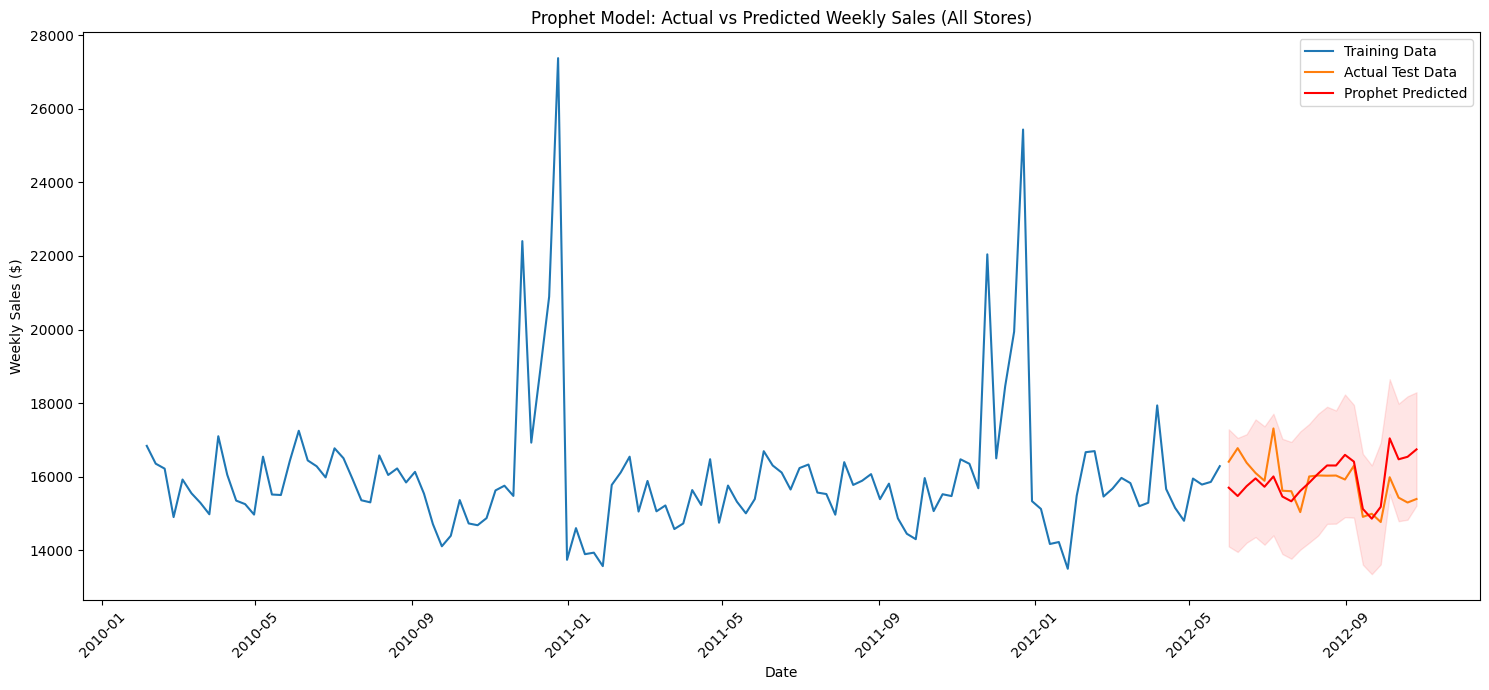

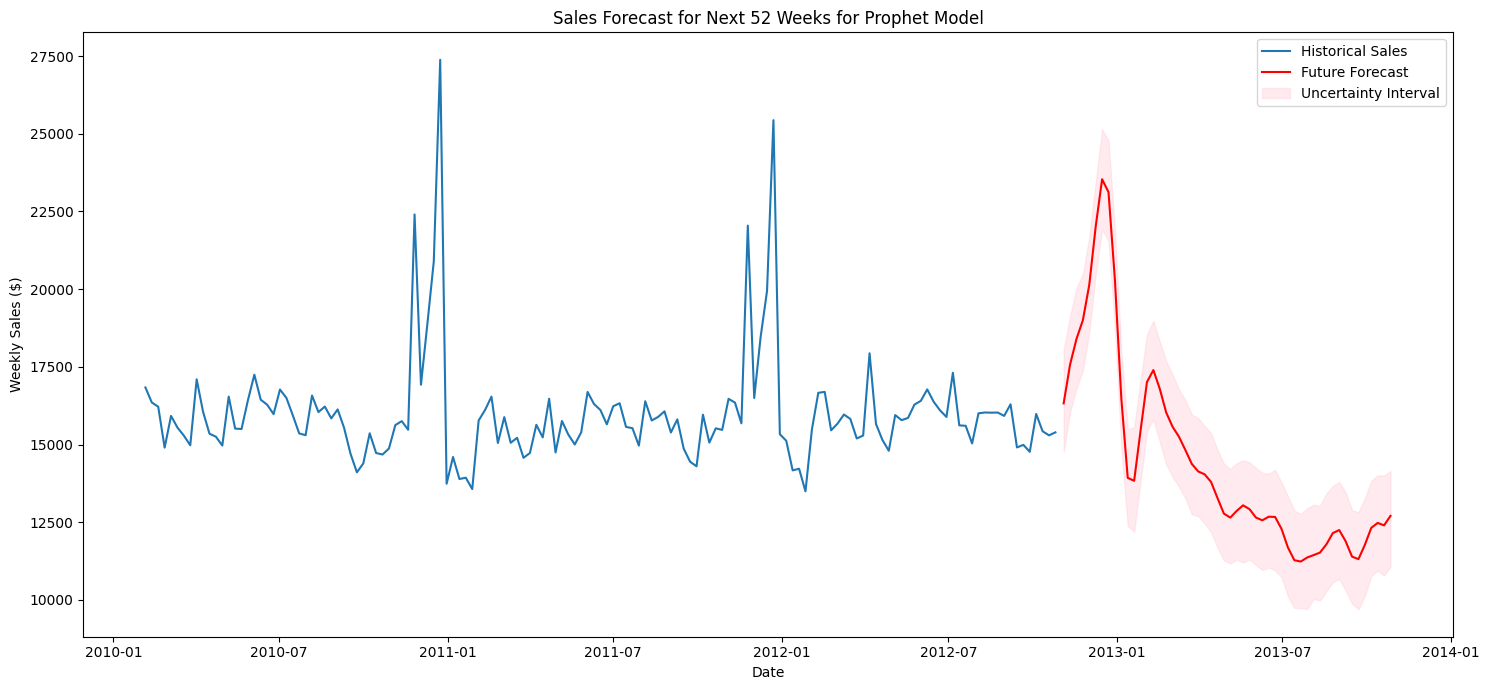

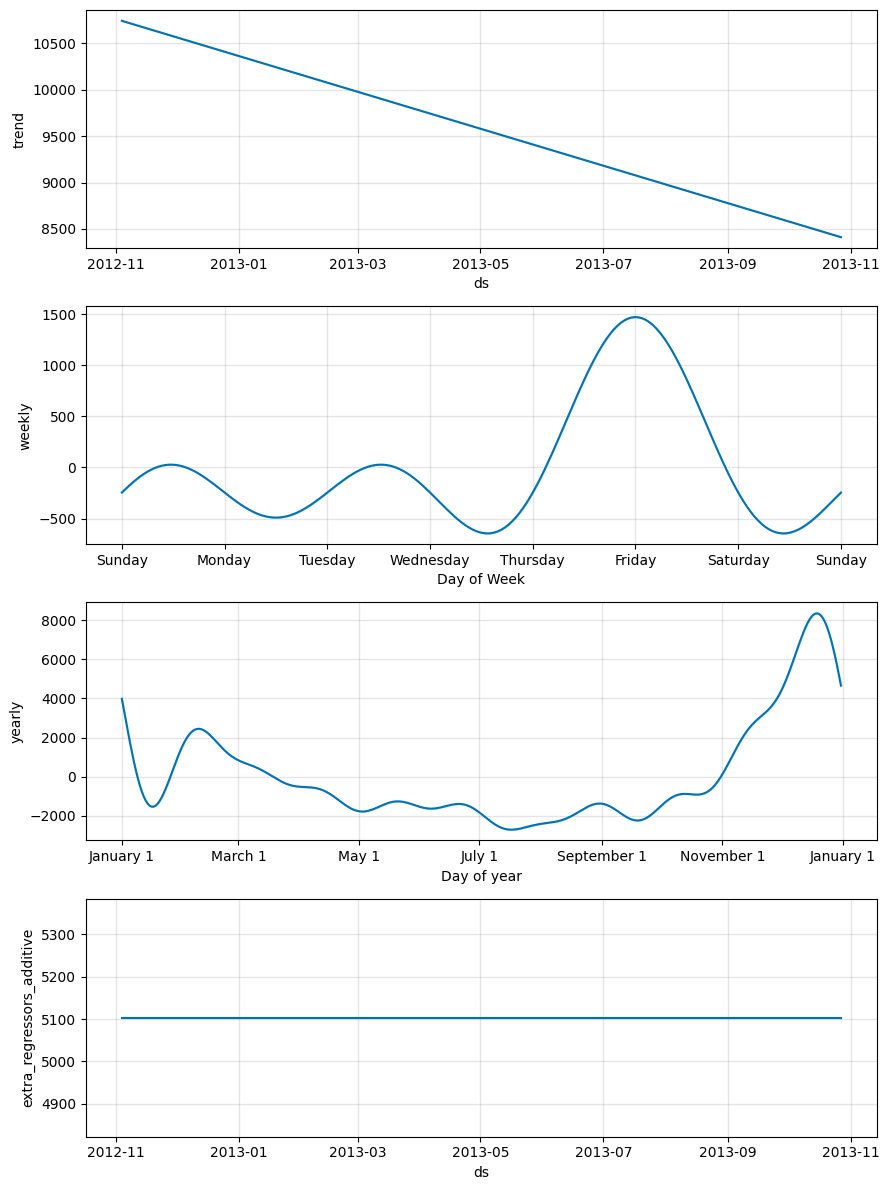

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Aggregate weekly sales across stores
weekly_data = data.groupby('Date').agg({
    'Weekly_Sales': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

# Sort by date
weekly_data = weekly_data.sort_values('Date')

# Calculate the split point (80% train, 20% test)
split_point = int(len(weekly_data) * 0.85)
train_data = weekly_data[:split_point]
test_data = weekly_data[split_point:]

print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

# Prepare data for Prophet
prophet_data = weekly_data.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})
prophet_data_train = prophet_data[:split_point]
prophet_data_test = prophet_data[split_point:]

# Train Prophet model
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_prophet.add_regressor('Temperature')
model_prophet.add_regressor('Fuel_Price')
model_prophet.add_regressor('CPI')
model_prophet.add_regressor('Unemployment')
model_prophet.fit(prophet_data_train)

# 1. Make predictions on test set
future_test = prophet_data_test[['ds', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
forecast_test = model_prophet.predict(future_test)

# Calculate metrics
mae_prophet = mean_absolute_error(prophet_data_test['y'], forecast_test['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(prophet_data_test['y'], forecast_test['yhat']))
r2_prophet = r2_score(prophet_data_test['y'], forecast_test['yhat'])
mse_prophet = mean_squared_error(prophet_data_test['y'], forecast_test['yhat'])

prophet_metrics = {'MAE': mae_prophet, 'MSE': mse_prophet, 'RMSE': rmse_prophet, 'R2': r2_prophet}

print("\nProphet Model Metrics (Test Set):")
print(f"MAE: ${mae_prophet:,.2f}")
print(f"RMSE: ${rmse_prophet:,.2f}")
print(f"R2 Score: {r2_prophet:.4f}")
print(f"MSE: {mse_prophet:.4f}")



# Plot test predictions


plt.figure(figsize=(15, 7))
plt.plot(prophet_data_train['ds'], prophet_data_train['y'], label='Training Data')
plt.plot(prophet_data_test['ds'], prophet_data_test['y'], label='Actual Test Data')
plt.plot(prophet_data_test['ds'], forecast_test['yhat'], label='Prophet Predicted', color='red')
plt.fill_between(prophet_data_test['ds'],
                forecast_test['yhat_lower'],
                forecast_test['yhat_upper'],
                color='red',
                alpha=0.1)
plt.title('Prophet Model: Actual vs Predicted Weekly Sales (All Stores)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Create future forecast (next 52 weeks)
future_periods = 52
last_date = prophet_data['ds'].max()

# Create future dataframe
future_dates = pd.date_range(
    start=last_date + pd.Timedelta(weeks=1),
    periods=future_periods,
    freq='W'
)
future_df = pd.DataFrame({'ds': future_dates})

# For exogenous regressors, we'll carry forward the last known values
last_vals = prophet_data.iloc[-1][['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    future_df[col] = last_vals[col]

# Make future forecast
future_forecast = model_prophet.predict(future_df)

# Plot historical data with future forecast
plt.figure(figsize=(15, 7))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Sales')
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Future Forecast', color='red')
plt.fill_between(
    future_forecast['ds'],
    future_forecast['yhat_lower'],
    future_forecast['yhat_upper'],
    color='pink',
    alpha=0.3,
    label='Uncertainty Interval'
)
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.title(f'Sales Forecast for Next {future_periods} Weeks for Prophet Model')

plt.legend()
plt.tight_layout()
plt.show()

# 3. Plot forecast components
fig = model_prophet.plot_components(future_forecast)
plt.tight_layout()
plt.show()

## SARIMAX,ARIMA and Halt-Winter Models for Forcasting on Weekly Sales

Training SARIMAX model...
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  121
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -102.091
Date:                            Sat, 05 Apr 2025   AIC                            222.183
Time:                                    04:42:35   BIC                            227.934
Sample:                                02-05-2010   HQIC                           221.650
                                     - 05-25-2012                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
temp            -8.5688    288.221     -0.030      0.976    -573.471     556.333
fue

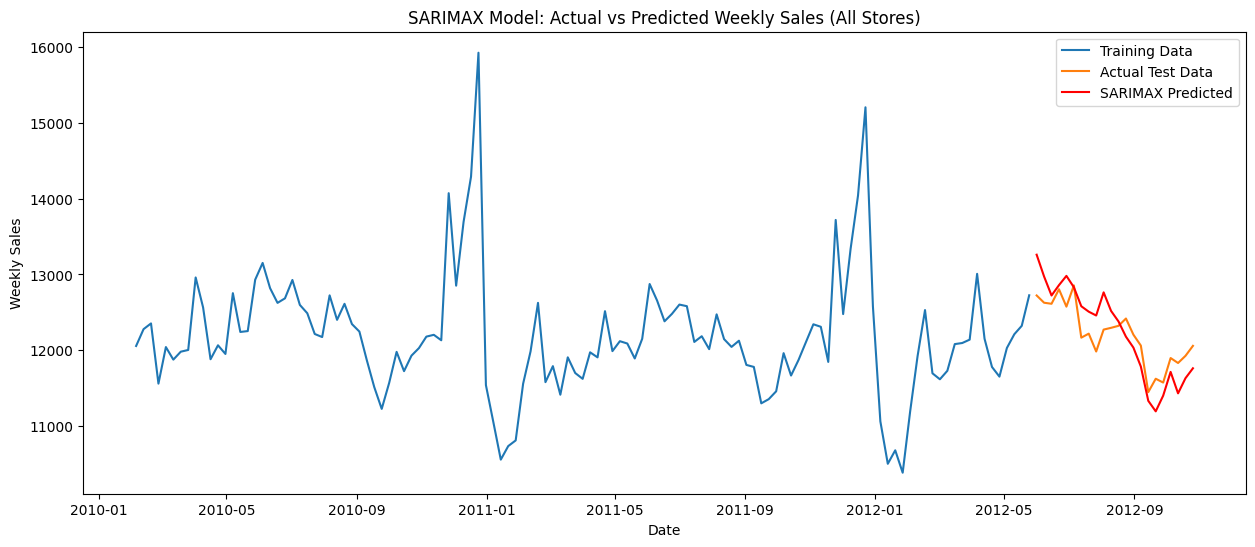

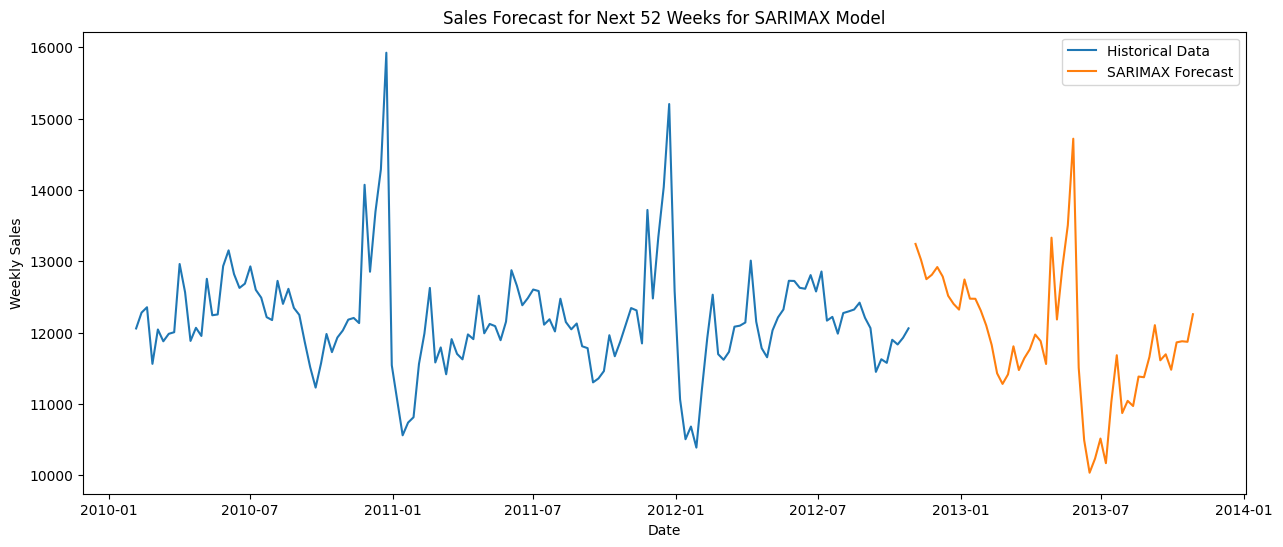


Training ARIMA model...
                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                  121
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -490.980
Date:                          Sat, 05 Apr 2025   AIC                            991.959
Time:                                  04:43:14   BIC                           1003.057
Sample:                              02-05-2010   HQIC                           996.357
                                   - 05-25-2012                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2082      0.156      1.337      0.181      -0.097       0.513
ma.L1         -0.9297     

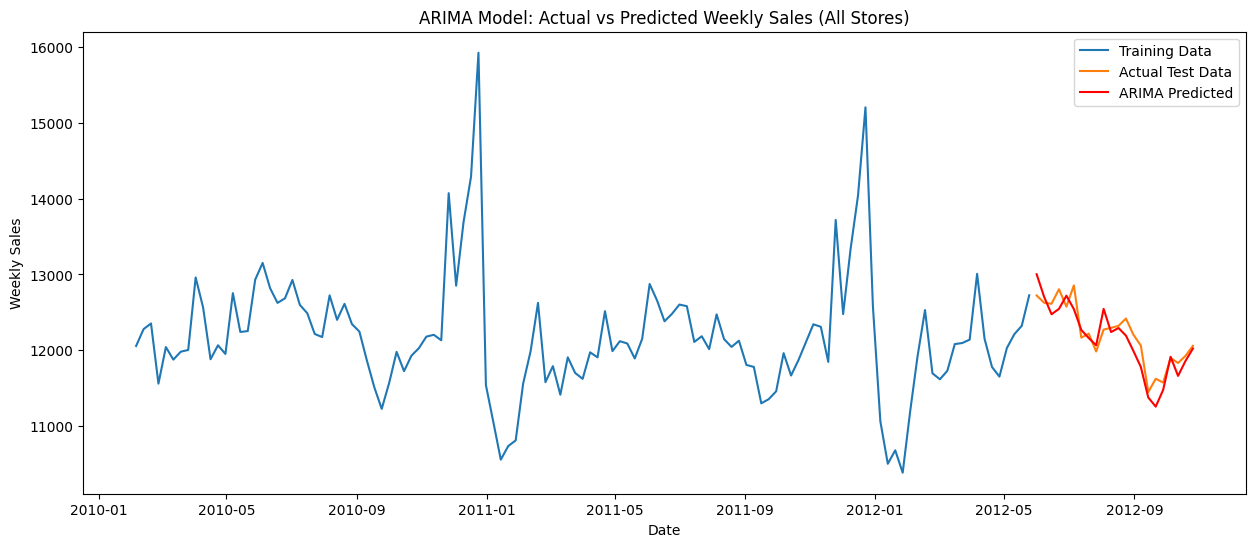

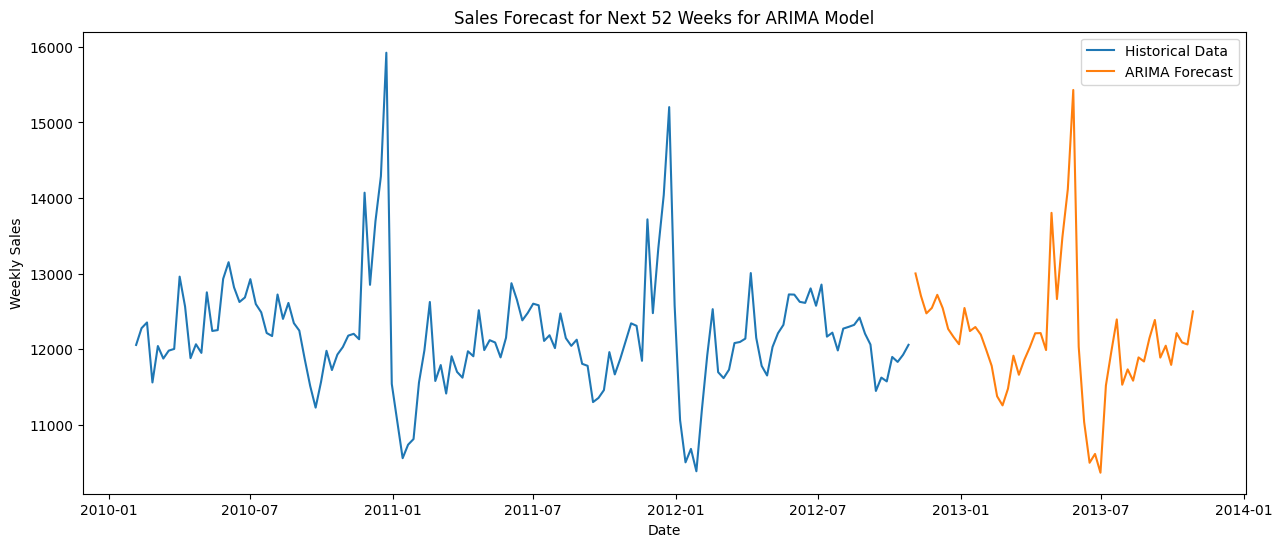


Training Holt-Winters model...
Holt-Winters model fitted
Holt-Winters Metrics:
MAE: 189.71
MSE: 51407.95
RMSE: 226.73
R2 Score: 0.66



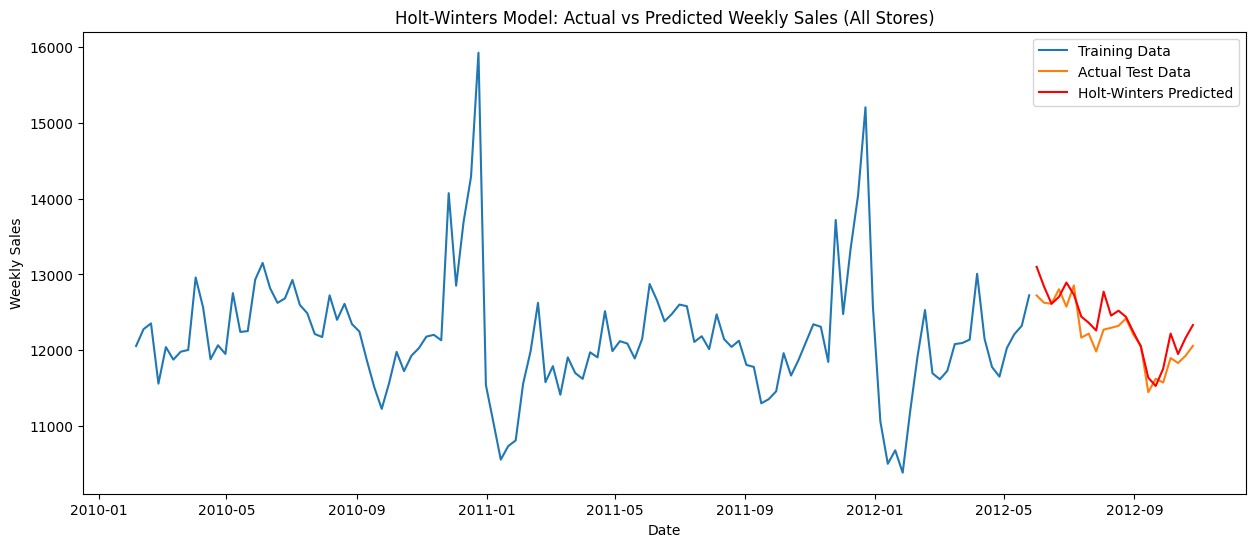

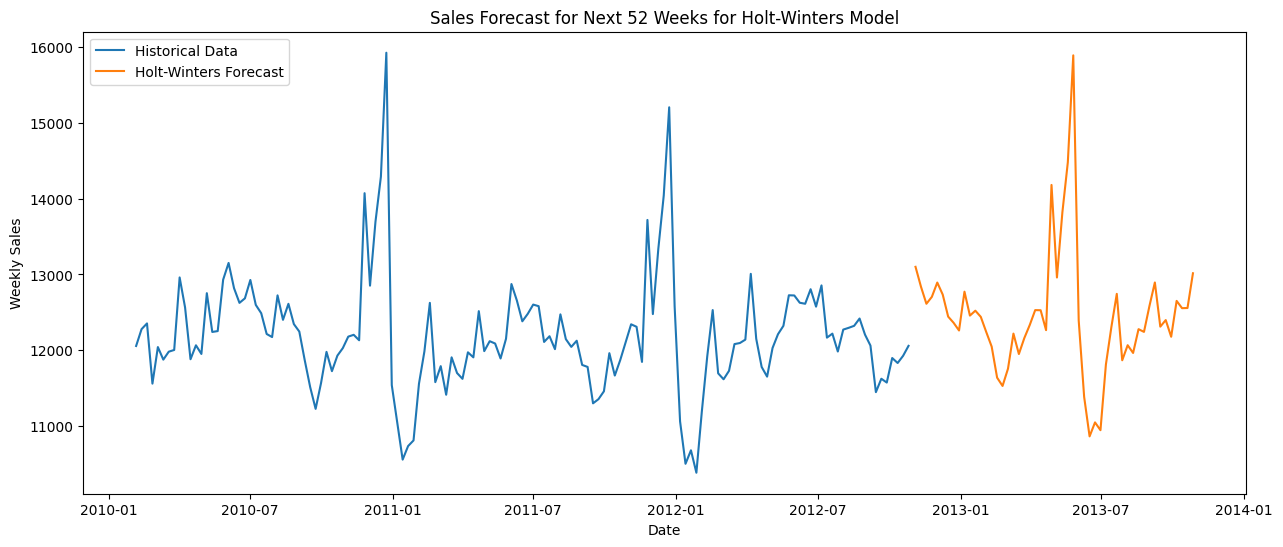


Model Comparison:


MAE            MSE        RMSE        R2
SARIMAX       272.671707   96304.376806  310.329465  0.360267
ARIMA         152.506791   34004.941727  184.404289  0.774111
Holt-Winters  189.714805   51407.954981  226.733224  0.658506
Prophet       558.027055  510565.635748  714.538757 -0.362326

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from prophet import Prophet
scaler = RobustScaler()
data['Weekly_Sales_Scaled'] = scaler.fit_transform(data[['Weekly_Sales']])
df_clean = data[abs(data['Weekly_Sales_Scaled']) < 3].copy()

# Create rolling average features for external regressors
# We compute the rolling mean for a window of 4 weeks per store
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    df_clean[col + '_MA'] = df_clean.groupby('Store')[col].transform(lambda x: x.rolling(window=4, min_periods=1).mean())

# Prepare Prophet dataframe using aggregated sales
prophet_df = df_clean.groupby('Date').agg({
    'Weekly_Sales': 'mean',
    'Temperature_MA': 'mean',
    'Fuel_Price_MA': 'mean',
    'CPI_MA': 'mean',
    'Unemployment_MA': 'mean'
}).reset_index()

prophet_df.rename(columns={
    'Date': 'ds',
    'Weekly_Sales': 'y',
    'Temperature_MA': 'temp',
    'Fuel_Price_MA': 'fuel_price',
    'CPI_MA': 'cpi',
    'Unemployment_MA': 'unemployment'
}, inplace=True)


# Prepare the data (using the same preprocessing as Prophet)
# Assuming prophet_df is already prepared from the previous code
ts_data = prophet_df.set_index('ds')

# Split into train and test (last 12 weeks for testing)
train_size = int(len(ts_data) * 0.85)
train, test = ts_data.iloc[:train_size], ts_data.iloc[train_size:]

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print()

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Function to plot results
def plot_results(train, test, model_name, test_pred=None):
    plt.figure(figsize=(15, 6))
    plt.plot(train.index, train['y'], label='Training Data')
    plt.plot(test.index, test['y'], label='Actual Test Data')

    if test_pred is not None:
        plt.plot(test.index, test_pred, label=f'{model_name} Predicted', color='red')

    # plt.plot(forecast.index, forecast, label='Forecast', color='red')
    plt.title(f'{model_name} Model: Actual vs Predicted Weekly Sales (All Stores)')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()

# 1. SARIMAX Model (with exogenous variables)
print("Training SARIMAX model...")
exog_vars = ['temp', 'fuel_price', 'cpi', 'unemployment']

#    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))

sarimax_model = SARIMAX(train['y'],
                        exog=train[exog_vars],
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 52),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_results = sarimax_model.fit(disp=False)
print(sarimax_results.summary())

# Predict on test set
sarimax_test_pred = sarimax_results.get_forecast(steps=len(test), exog=test[exog_vars]).predicted_mean
sarimax_metrics = evaluate_model(test['y'], sarimax_test_pred, "SARIMAX")

# Forecast future values (using last values of exog vars)
future_periods = 52
last_exog = ts_data[exog_vars].iloc[-1:].values
future_exog = np.tile(last_exog, (future_periods, 1))

sarimax_forecast = sarimax_results.get_forecast(steps=future_periods, exog=future_exog).predicted_mean
future_dates = pd.date_range(start=ts_data.index[-1] + pd.Timedelta(weeks=1), periods=future_periods, freq='W')
sarimax_forecast = pd.Series(sarimax_forecast.values, index=future_dates)

# Plot results
plot_results(train, test, "SARIMAX", sarimax_test_pred)
# Plot all forecasts together
plt.figure(figsize=(15, 6))
plt.plot(ts_data.index, ts_data['y'], label='Historical Data')
plt.plot(sarimax_forecast.index, sarimax_forecast, label='SARIMAX Forecast')
plt.title(f'Sales Forecast for Next {future_periods} Weeks for SARIMAX Model')

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# 2. ARIMA Model (without exogenous variables)
print("\nTraining ARIMA model...")
# arima_model = ARIMA(train['y'], order=(1, 1, 1))

# Option 1: Enhanced manual ARIMA configuration
arima_model = ARIMA(
        train['y'],
        order=(1, 1, 1),  # (p,d,q)
        seasonal_order=(1, 1, 1, 52),  # (P,D,Q,s)
        enforce_stationarity=True,
        enforce_invertibility=True
    )
arima_results = arima_model.fit()
print(arima_results.summary())

# Predict on test set
arima_test_pred = arima_results.get_forecast(steps=len(test)).predicted_mean
arima_metrics = evaluate_model(test['y'], arima_test_pred, "ARIMA")

# Forecast future values
arima_forecast = arima_results.get_forecast(steps=future_periods).predicted_mean
arima_forecast = pd.Series(arima_forecast.values, index=future_dates)

# Plot results
plot_results(train, test, "ARIMA", arima_test_pred)

plt.figure(figsize=(15, 6))
plt.plot(ts_data.index, ts_data['y'], label='Historical Data')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast')
plt.title(f'Sales Forecast for Next {future_periods} Weeks for ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()
# 3. Holt-Winters Model
print("\nTraining Holt-Winters model...")
test_weeks=20
trend='additive'
seasonal='additive'
seasonal_periods=52
hw_model = ExponentialSmoothing(train['y'],
                                   trend=trend,
                                   seasonal=seasonal,
                                   seasonal_periods=seasonal_periods,
                                   initialization_method='estimated')

hw_results = hw_model.fit()
print("Holt-Winters model fitted")

# Predict on test set
hw_test_pred = hw_results.forecast(len(test))
hw_metrics = evaluate_model(test['y'], hw_test_pred, "Holt-Winters")

# Forecast future values
hw_forecast = hw_results.forecast(future_periods)
hw_forecast = pd.Series(hw_forecast.values, index=future_dates)

# Plot results
plot_results(train, test, "Holt-Winters", hw_test_pred)

plt.figure(figsize=(15, 6))
plt.plot(ts_data.index, ts_data['y'], label='Historical Data')
plt.plot(hw_forecast.index, hw_forecast, label='Holt-Winters Forecast')
# plt.plot(future_forecast.index, future_forecast, label='Holt-Winters Forecast')
plt.title(f'Sales Forecast for Next {future_periods} Weeks for Holt-Winters Model')

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# Compare all models
metrics_df = pd.DataFrame({
    'SARIMAX': sarimax_metrics,
    'ARIMA': arima_metrics,
    'Holt-Winters': hw_metrics,
    "Prophet": prophet_metrics
}).T

print("\nModel Comparison:")
metrics_df


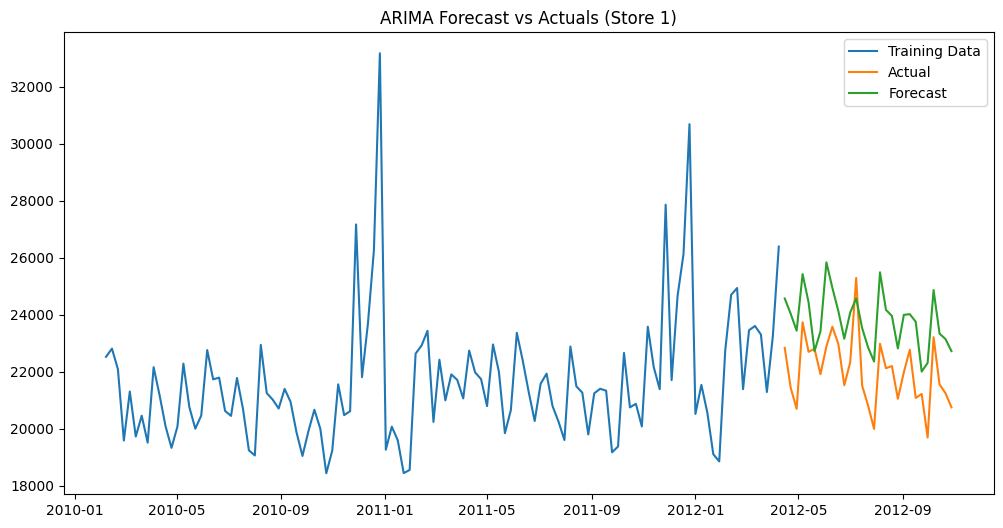

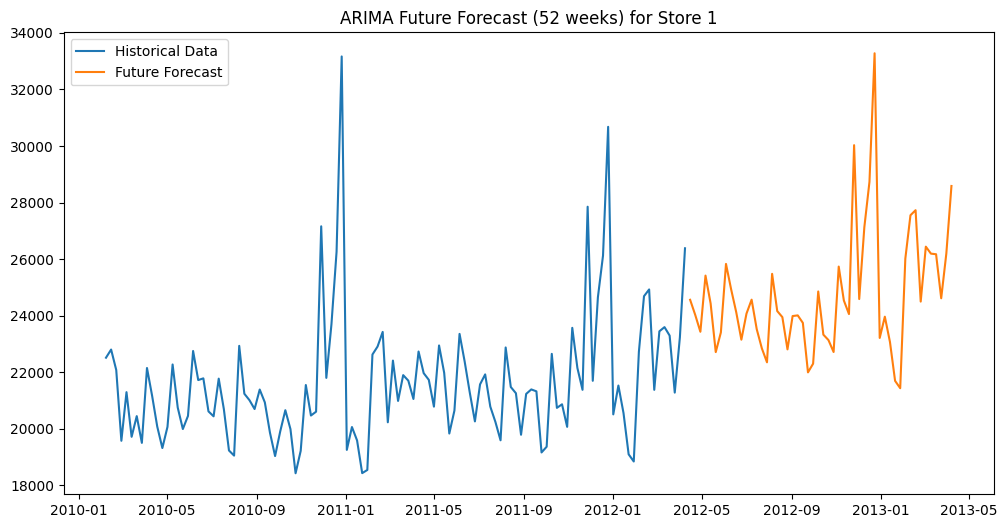

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.75518D+00    |proj g|=  6.25530D-01


 This problem is unconstrained.



At iterate    5    f=  4.48659D+00    |proj g|=  2.10184D-02

At iterate   10    f=  4.48222D+00    |proj g|=  5.06107D-03

At iterate   15    f=  4.48155D+00    |proj g|=  2.21005D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     20      1     0     0   8.250D-05   4.482D+00
  F =   4.4815446623324116     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


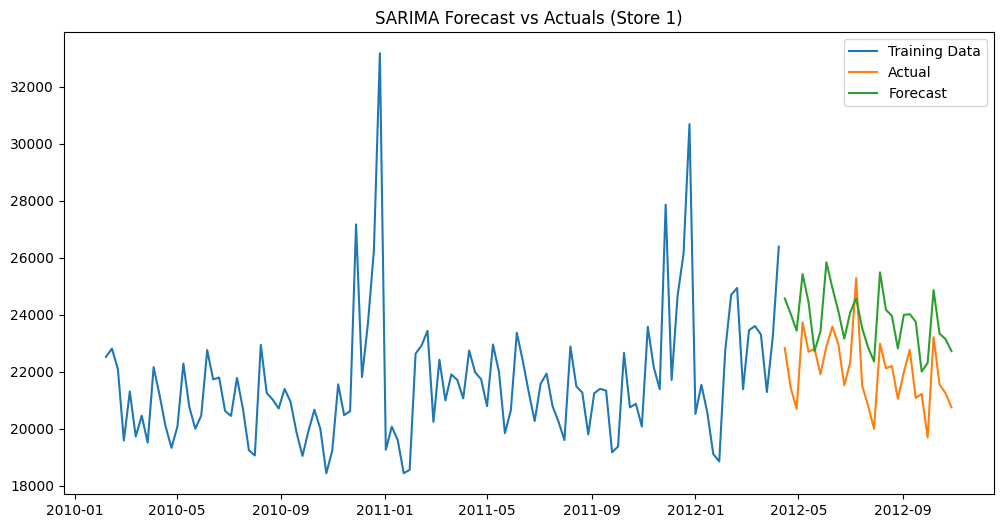

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.75518D+00    |proj g|=  6.25530D-01


 This problem is unconstrained.



At iterate    5    f=  4.48659D+00    |proj g|=  2.10184D-02

At iterate   10    f=  4.48222D+00    |proj g|=  5.06107D-03

At iterate   15    f=  4.48155D+00    |proj g|=  2.21005D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     20      1     0     0   8.250D-05   4.482D+00
  F =   4.4815446623324116     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


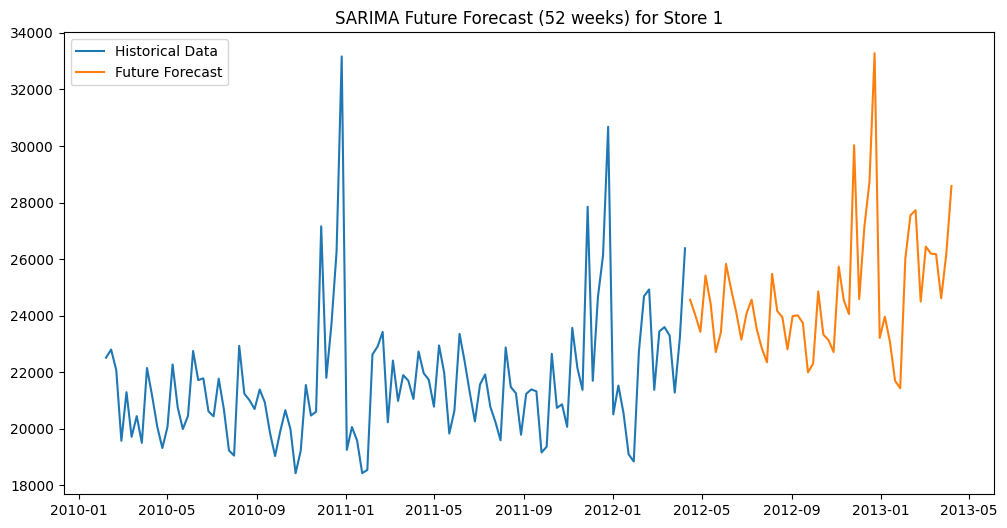

04:44:14 - cmdstanpy - INFO - Chain [1] start processing
04:44:14 - cmdstanpy - INFO - Chain [1] done processing


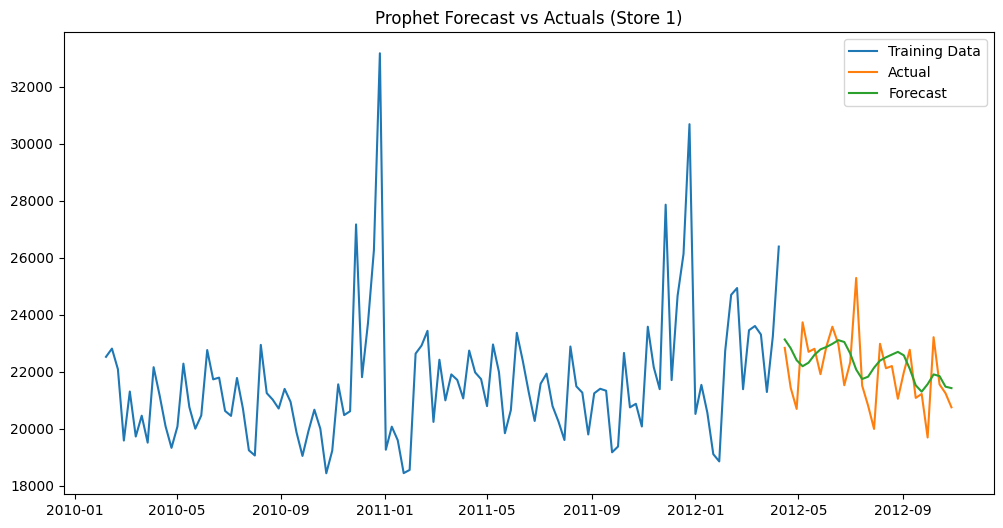

04:44:14 - cmdstanpy - INFO - Chain [1] start processing
04:44:14 - cmdstanpy - INFO - Chain [1] done processing


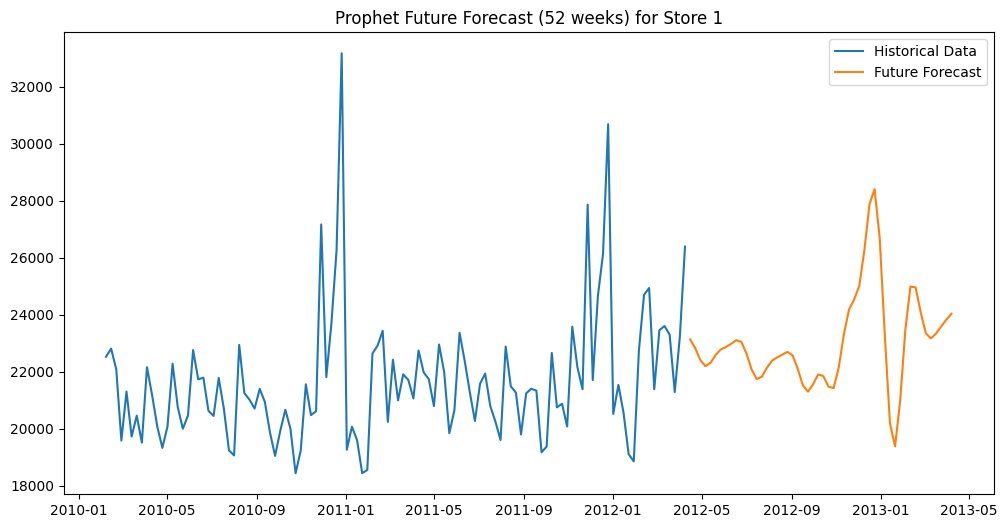

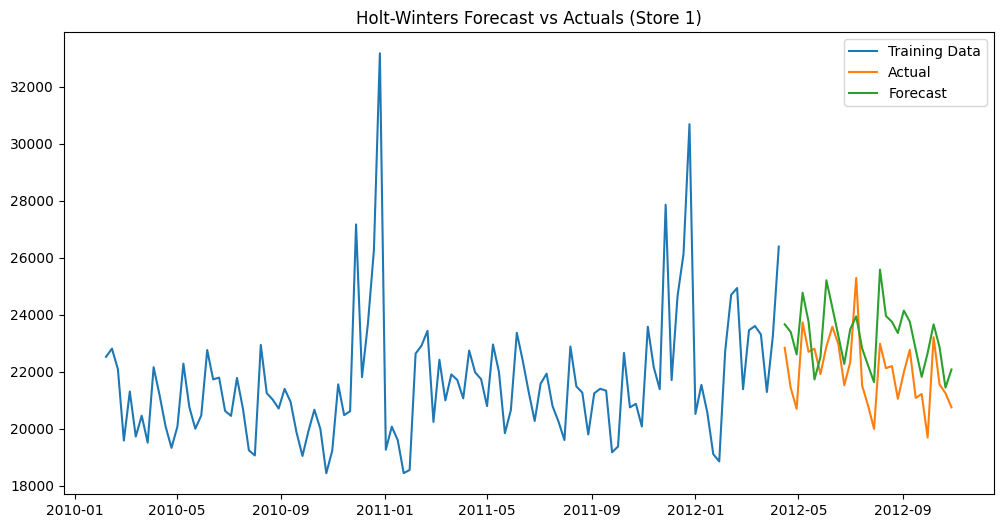

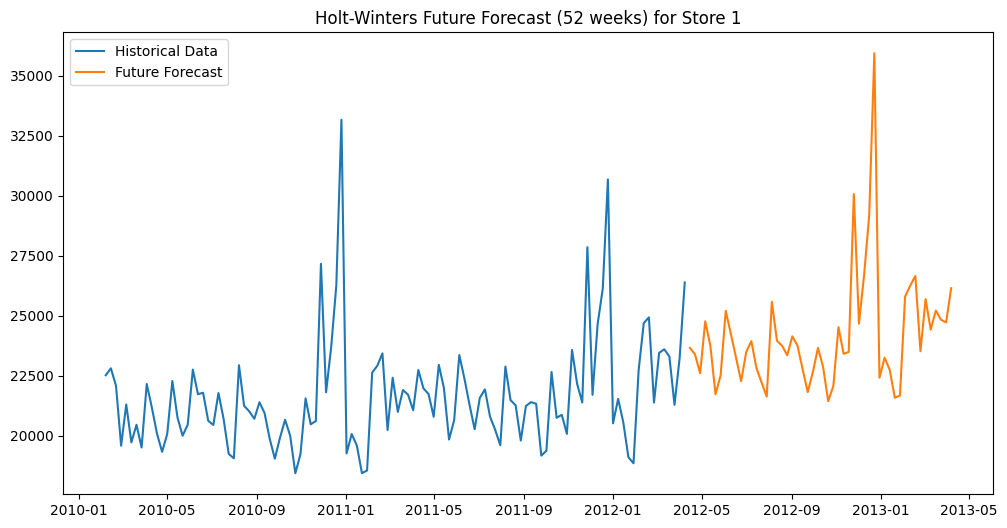


Model Comparison:


Model         RMSE          MAE
0         ARIMA  1927.668066  1821.289937
1        SARIMA  1927.668066  1821.289937
2       Prophet  1132.569148   853.522766
3  Holt-Winters  1521.918738  1356.745268

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import zscore
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

store1_data = data[data['Store'] == 1].sort_values('Date')
store1_data = store1_data.set_index('Date')['Weekly_Sales'].resample('W').mean().fillna(method='ffill')

# Split data into train and test
train_size = int(len(store1_data) * 0.8)
train_data, test_data_ts = store1_data[:train_size], store1_data[train_size:]

# Function to evaluate models
def evaluate_model(model, train_data, test_data, model_name):
    # Fit model
    if model_name in ['ARIMA', 'SARIMA']:
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test_data))
    elif model_name == 'Prophet':
        prophet_df = train_data.reset_index()
        prophet_df.columns = ['ds', 'y']
        model.fit(prophet_df)
        future = model.make_future_dataframe(periods=len(test_data), freq='W')
        forecast = model.predict(future)['yhat'][-len(test_data):]
    elif model_name == 'Holt-Winters':
        model_fit = model.fit()
        forecast = model_fit.forecast(len(test_data))
    else:
        raise ValueError("Unknown model type")

    # Calculate metrics
    mse = mean_squared_error(test_data, forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_data, forecast)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data, label='Training Data')
    plt.plot(test_data.index, test_data, label='Actual')
    plt.plot(test_data.index, forecast, label='Forecast')
    plt.title(f'{model_name} Forecast vs Actuals (Store 1)')
    plt.legend()
    plt.show()

    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae, 'Forecast': forecast}

# Function for future forecasting
def future_forecast(model, train_data, periods, model_name):
    if model_name in ['ARIMA', 'SARIMA']:
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=periods)
    elif model_name == 'Prophet':
        prophet_df = train_data.reset_index()
        prophet_df.columns = ['ds', 'y']
        model.fit(prophet_df)
        future = model.make_future_dataframe(periods=periods, freq='W')
        forecast = model.predict(future)['yhat'][-periods:]
    elif model_name == 'Holt-Winters':
        model_fit = model.fit()
        forecast = model_fit.forecast(periods)
    else:
        raise ValueError("Unknown model type")

    # Create future dates
    last_date = train_data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=periods, freq='W')

    # Plot future forecast
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data, label='Historical Data')
    plt.plot(future_dates, forecast, label='Future Forecast')
    plt.title(f'{model_name} Future Forecast ({periods} weeks) for Store 1')
    plt.legend()
    plt.show()

    return forecast

# Model 1: ARIMA
arima_model = ARIMA(
        train_data,
        order=(1, 1, 1),  # (p,d,q)
        seasonal_order=(1, 1, 1, 52),  # (P,D,Q,s)
        enforce_stationarity=True,
        enforce_invertibility=True
    )

# arima_order = (2, 1, 2)  # Example order, should be optimized in practice
# arima_model = ARIMA(train_data, order=arima_order)
arima_results = evaluate_model(arima_model, train_data, test_data_ts, 'ARIMA')

# Future forecasting with ARIMA
arima_future = future_forecast(arima_model, train_data, 52, 'ARIMA')

# Model 2: SARIMA
sarima_order = (1, 1, 1)
sarima_seasonal_order = (1, 1, 1, 52)  # Weekly data with yearly seasonality
sarima_model = SARIMAX(train_data, order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_results = evaluate_model(sarima_model, train_data, test_data_ts, 'SARIMA')

# Future forecasting with SARIMA
sarima_future = future_forecast(sarima_model, train_data, 52, 'SARIMA')

# Model 3: Prophet

# Train Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True)

prophet_results = evaluate_model(prophet_model, train_data, test_data_ts, 'Prophet')

# Model 3: Prophet

prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# Future forecasting with Prophet
prophet_future = future_forecast(prophet_model, train_data, 52, 'Prophet')

# Model 4: Holt-Winters
# test_weeks=20
trend='additive'
seasonal='additive'

holt_winters_model = ExponentialSmoothing(
    train_data,
    trend=trend,
    seasonal=seasonal,
    seasonal_periods=52,
    initialization_method='estimated'  # Weekly data with yearly seasonality
)
holt_winters_results = evaluate_model(holt_winters_model, train_data, test_data_ts, 'Holt-Winters')

# Future forecasting with Holt-Winters
holt_winters_future = future_forecast(holt_winters_model, train_data, 52, 'Holt-Winters')

# Compare all models
results_df = pd.DataFrame([arima_results, sarima_results, prophet_results, holt_winters_results])
results_df = results_df[['Model', 'RMSE', 'MAE']]  # Exclude forecast column for display
print("\nModel Comparison:")
results_df


In [ ]:
# # Plot all forecasts together for comparison
# plt.figure(figsize=(14, 8))
# plt.plot(test_data_ts.index, test_data_ts, label='Actual', linewidth=2)
# plt.plot(test_data_ts.index, arima_results['Forecast'], label='ARIMA', linestyle='--')
# plt.plot(test_data_ts.index, sarima_results['Forecast'], label='SARIMA', linestyle='--')
# plt.plot(test_data_ts.index, prophet_results['Forecast'], label='Prophet', linestyle='--')
# plt.plot(test_data_ts.index, holt_winters_results['Forecast'], label='Holt-Winters', linestyle='--')
# plt.title('Model Prediction Comparison (Store 1)')
# plt.legend()
# plt.show()

# # Plot all future forecasts together for comparison
# plt.figure(figsize=(14, 8))
# future_dates = pd.date_range(start=train_data.index[-1] + pd.Timedelta(weeks=1), periods=52, freq='W')

# plt.plot(future_dates, arima_future, label='ARIMA', linestyle='--')
# plt.plot(future_dates, sarima_future, label='SARIMA', linestyle='--')
# plt.plot(future_dates, prophet_future, label='Prophet', linestyle='--')
# plt.plot(future_dates, holt_winters_future, label='Holt-Winters', linestyle='--')
# plt.title('Future Forecasts Comparison (Store 1)')
# plt.legend()
# plt.show()